## IMPORTING LIBRARIES


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## DATA PREPROCESSING

### TRAINING IMAGE PREPROCESSING

In [3]:
training_set=tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


### VALIDATION IMAGE PREPROCESSING

In [6]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    'validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


In [8]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[114.22778    97.02881    62.02466  ]
   [128.61719    79.64844    40.171387 ]
   [181.27173   117.02515    65.933105 ]
   ...
   [179.2456    160.60498   104.59985  ]
   [144.27344   146.00049   131.80054  ]
   [148.77222   141.38037   126.38159  ]]

  [[104.39844    75.15259    27.222412 ]
   [133.26099    86.07666    51.898438 ]
   [179.98438   120.49219    60.523438 ]
   ...
   [161.52881   150.53394    96.69287  ]
   [139.27344   142.49219   102.49219  ]
   [144.87866   146.87866   124.87866  ]]

  [[ 87.329834   45.58252     5.498291 ]
   [134.93481    83.934814   19.747314 ]
   [182.3125    124.13281    42.851562 ]
   ...
   [139.73364   128.64136    75.671875 ]
   [148.29395   140.46606    94.406006 ]
   [146.53735   144.        134.08325  ]]

  ...

  [[139.64429   121.823975   45.4646   ]
   [138.72388   116.59619    45.630127 ]
   [125.04199    95.04199    22.041992 ]
   ...
   [191.36865   113.90698    73.35376  ]
   [211.64331   132.79688    98.29175  ]
   [2

## BUILDING MODEL

In [10]:
cnn=tf.keras.models.Sequential()

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
cnn.add(tf.keras.layers.Flatten())

In [18]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [20]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [22]:
cnn.add(tf.keras.layers.Dropout(0.5)) # To avoid Overfitting

In [24]:
# For Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

## MODEL SUMMARY

In [27]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     5,538,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,744,452 (21.91 MB)

 Trainable params: 5,744,452 (21.91 MB)

 Non-trainable params: 0 (0.00 B)

## COMPILING MODEL

In [30]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## MODEL TRAINING 

In [32]:
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32


2024-10-30 15:08:58.337717: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 38s 435ms/step - accuracy: 0.0233 - loss: 47.3906

2024-10-30 15:09:02.440218: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 33s 421ms/step - accuracy: 0.0283 - loss: 33.4934

2024-10-30 15:09:06.158537: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:09:06.248559: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:09:06.435504: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 36s 457ms/step - accuracy: 0.0288 - loss: 32.5183

2024-10-30 15:09:06.897649: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 34s 446ms/step - accuracy: 0.0297 - loss: 30.7678

2024-10-30 15:09:07.523212: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 30s 435ms/step - accuracy: 0.0327 - loss: 25.6246

2024-10-30 15:09:10.949007: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 27s 447ms/step - accuracy: 0.0351 - loss: 22.6124

2024-10-30 15:09:14.852145: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:09:15.089282: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 28s 471ms/step - accuracy: 0.0359 - loss: 21.9120

2024-10-30 15:09:16.008683: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 26s 468ms/step - accuracy: 0.0375 - loss: 20.6708

2024-10-30 15:09:17.805136: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 19s 464ms/step - accuracy: 0.0408 - loss: 17.6710

2024-10-30 15:09:23.851013: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:09:23.944707: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 19s 469ms/step - accuracy: 0.0411 - loss: 17.3097

2024-10-30 15:09:25.068066: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:09:25.189960: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 17s 468ms/step - accuracy: 0.0414 - loss: 16.8048

2024-10-30 15:09:26.144715: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 17s 468ms/step - accuracy: 0.0415 - loss: 16.6456

2024-10-30 15:09:26.901521: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 10s 457ms/step - accuracy: 0.0421 - loss: 14.6822

2024-10-30 15:09:33.015348: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 7s 467ms/step - accuracy: 0.0420 - loss: 13.9718

2024-10-30 15:09:36.904753: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:09:36.905042: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 ━━━━━━━━━━━━━━━━━━━━ 5s 466ms/step - accuracy: 0.0420 - loss: 13.6971

2024-10-30 15:09:38.457435: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 5s 470ms/step - accuracy: 0.0420 - loss: 13.6091

2024-10-30 15:09:39.281400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.0418 - loss: 12.7416

2024-10-30 15:09:43.783281: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:09:46.798677: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 51s 506ms/step - accuracy: 0.0418 - loss: 12.6712 - val_accuracy: 0.0627 - val_loss: 3.4165
Epoch 2/32


2024-10-30 15:09:47.896936: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 51s 540ms/step - accuracy: 0.0312 - loss: 3.6334 

2024-10-30 15:09:49.442939: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 42s 465ms/step - accuracy: 0.0381 - loss: 3.5953

2024-10-30 15:09:51.667520: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 40s 471ms/step - accuracy: 0.0443 - loss: 3.5816

2024-10-30 15:09:54.176695: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 39s 502ms/step - accuracy: 0.0476 - loss: 3.5651

2024-10-30 15:09:57.547919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 35s 477ms/step - accuracy: 0.0503 - loss: 3.5565

2024-10-30 15:09:59.599588: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:09:59.658592: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 31s 465ms/step - accuracy: 0.0526 - loss: 3.5491

2024-10-30 15:10:02.568819: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 26s 464ms/step - accuracy: 0.0544 - loss: 3.5403

2024-10-30 15:10:06.649362: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 26s 471ms/step - accuracy: 0.0546 - loss: 3.5384

2024-10-30 15:10:07.817557: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:10:08.340409: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 24s 472ms/step - accuracy: 0.0550 - loss: 3.5350

2024-10-30 15:10:09.913325: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 23s 470ms/step - accuracy: 0.0553 - loss: 3.5332

2024-10-30 15:10:10.809623: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 22s 468ms/step - accuracy: 0.0554 - loss: 3.5316

2024-10-30 15:10:11.603117: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:10:11.611628: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 21s 468ms/step - accuracy: 0.0557 - loss: 3.5292

2024-10-30 15:10:13.089279: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 16s 462ms/step - accuracy: 0.0570 - loss: 3.5215

2024-10-30 15:10:17.289407: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:10:17.405485: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 12s 464ms/step - accuracy: 0.0584 - loss: 3.5164

2024-10-30 15:10:20.720827: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 11s 462ms/step - accuracy: 0.0590 - loss: 3.5144

2024-10-30 15:10:21.964330: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:10:22.412534: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 6s 464ms/step - accuracy: 0.0606 - loss: 3.5088

2024-10-30 15:10:26.924274: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


94/98 ━━━━━━━━━━━━━━━━━━━━ 1s 463ms/step - accuracy: 0.0621 - loss: 3.5036

2024-10-30 15:10:31.759290: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - accuracy: 0.0625 - loss: 3.5018

2024-10-30 15:10:32.810150: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:10:33.819482: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 49s 493ms/step - accuracy: 0.0626 - loss: 3.5014 - val_accuracy: 0.2678 - val_loss: 3.1890
Epoch 3/32
 4/98 ━━━━━━━━━━━━━━━━━━━━ 44s 468ms/step - accuracy: 0.0911 - loss: 3.3971

2024-10-30 15:10:38.790057: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 41s 453ms/step - accuracy: 0.0950 - loss: 3.3796

2024-10-30 15:10:40.501790: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 42s 484ms/step - accuracy: 0.0951 - loss: 3.3929

2024-10-30 15:10:41.472006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 38s 467ms/step - accuracy: 0.0962 - loss: 3.4105

2024-10-30 15:10:43.997882: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 37s 459ms/step - accuracy: 0.0958 - loss: 3.4143

2024-10-30 15:10:44.903225: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 35s 463ms/step - accuracy: 0.0946 - loss: 3.4181

2024-10-30 15:10:46.973294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:10:47.144474: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 33s 458ms/step - accuracy: 0.0941 - loss: 3.4181

2024-10-30 15:10:47.989447: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 30s 480ms/step - accuracy: 0.0931 - loss: 3.4110

2024-10-30 15:10:53.650775: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:10:53.864149: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 30s 503ms/step - accuracy: 0.0933 - loss: 3.4083

2024-10-30 15:10:55.596076: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 30s 502ms/step - accuracy: 0.0934 - loss: 3.4075

2024-10-30 15:10:55.890610: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 27s 492ms/step - accuracy: 0.0937 - loss: 3.4044

2024-10-30 15:10:57.514852: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 25s 496ms/step - accuracy: 0.0940 - loss: 3.4008

2024-10-30 15:10:59.911484: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 23s 496ms/step - accuracy: 0.0943 - loss: 3.3978

2024-10-30 15:11:01.848203: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 22s 497ms/step - accuracy: 0.0944 - loss: 3.3970

2024-10-30 15:11:02.501377: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 21s 513ms/step - accuracy: 0.0948 - loss: 3.3931

2024-10-30 15:11:06.245960: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 15s 506ms/step - accuracy: 0.0960 - loss: 3.3833

2024-10-30 15:11:10.454696: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 8s 486ms/step - accuracy: 0.0985 - loss: 3.3710

2024-10-30 15:11:15.627592: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 8s 484ms/step - accuracy: 0.0987 - loss: 3.3701

2024-10-30 15:11:16.082398: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


90/98 ━━━━━━━━━━━━━━━━━━━━ 3s 473ms/step - accuracy: 0.1005 - loss: 3.3615

2024-10-30 15:11:19.183056: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


91/98 ━━━━━━━━━━━━━━━━━━━━ 3s 471ms/step - accuracy: 0.1007 - loss: 3.3605

2024-10-30 15:11:19.793610: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


94/98 ━━━━━━━━━━━━━━━━━━━━ 1s 470ms/step - accuracy: 0.1013 - loss: 3.3577

2024-10-30 15:11:20.941094: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.1021 - loss: 3.3540

2024-10-30 15:11:23.988866: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:11:24.325721: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 49s 496ms/step - accuracy: 0.1023 - loss: 3.3531 - val_accuracy: 0.3020 - val_loss: 2.7446
Epoch 4/32


2024-10-30 15:11:25.925105: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 37s 429ms/step - accuracy: 0.1113 - loss: 3.1645

2024-10-30 15:11:30.198873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 36s 429ms/step - accuracy: 0.1124 - loss: 3.1657

2024-10-30 15:11:31.287203: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 34s 420ms/step - accuracy: 0.1142 - loss: 3.1679

2024-10-30 15:11:32.761304: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 33s 414ms/step - accuracy: 0.1157 - loss: 3.1699

2024-10-30 15:11:33.602382: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 33s 435ms/step - accuracy: 0.1172 - loss: 3.1716

2024-10-30 15:11:34.685378: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 31s 426ms/step - accuracy: 0.1186 - loss: 3.1737

2024-10-30 15:11:36.285240: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 28s 418ms/step - accuracy: 0.1191 - loss: 3.1776

2024-10-30 15:11:38.639734: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 26s 410ms/step - accuracy: 0.1196 - loss: 3.1791

2024-10-30 15:11:40.256315: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 26s 429ms/step - accuracy: 0.1200 - loss: 3.1796

2024-10-30 15:11:41.431413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 24s 424ms/step - accuracy: 0.1208 - loss: 3.1789

2024-10-30 15:11:42.437931: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 20s 411ms/step - accuracy: 0.1236 - loss: 3.1743

2024-10-30 15:11:45.880882: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 19s 407ms/step - accuracy: 0.1246 - loss: 3.1723

2024-10-30 15:11:46.785696: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:11:46.868921: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 17s 408ms/step - accuracy: 0.1257 - loss: 3.1699

2024-10-30 15:11:48.280108: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 15s 408ms/step - accuracy: 0.1282 - loss: 3.1633

2024-10-30 15:11:50.582316: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 13s 404ms/step - accuracy: 0.1302 - loss: 3.1570

2024-10-30 15:11:52.292582: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 11s 405ms/step - accuracy: 0.1321 - loss: 3.1518

2024-10-30 15:11:53.982920: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 10s 403ms/step - accuracy: 0.1338 - loss: 3.1467

2024-10-30 15:11:55.804381: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:11:55.824225: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 8s 403ms/step - accuracy: 0.1359 - loss: 3.1402

2024-10-30 15:11:57.491639: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 7s 408ms/step - accuracy: 0.1367 - loss: 3.1378

2024-10-30 15:11:58.646238: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:11:58.932349: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.1427 - loss: 3.1195

2024-10-30 15:12:04.976760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:12:06.136716: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 433ms/step - accuracy: 0.1429 - loss: 3.1186 - val_accuracy: 0.4701 - val_loss: 2.2831
Epoch 5/32
 1/98 ━━━━━━━━━━━━━━━━━━━━ 38s 393ms/step - accuracy: 0.1875 - loss: 2.9665

2024-10-30 15:12:08.687526: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 37s 404ms/step - accuracy: 0.1816 - loss: 2.9136

2024-10-30 15:12:10.323549: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 42s 466ms/step - accuracy: 0.1805 - loss: 2.9057

2024-10-30 15:12:11.530955: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 37s 462ms/step - accuracy: 0.1991 - loss: 2.8843

2024-10-30 15:12:15.773455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:12:15.974131: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 34s 442ms/step - accuracy: 0.2010 - loss: 2.8805

2024-10-30 15:12:16.964581: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 30s 424ms/step - accuracy: 0.2048 - loss: 2.8711

2024-10-30 15:12:19.155601: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 26s 419ms/step - accuracy: 0.2092 - loss: 2.8602

2024-10-30 15:12:22.716266: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 25s 413ms/step - accuracy: 0.2108 - loss: 2.8577

2024-10-30 15:12:23.770110: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 24s 411ms/step - accuracy: 0.2113 - loss: 2.8570

2024-10-30 15:12:24.119340: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 22s 417ms/step - accuracy: 0.2138 - loss: 2.8544

2024-10-30 15:12:26.958662: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 21s 412ms/step - accuracy: 0.2145 - loss: 2.8540

2024-10-30 15:12:27.737413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 20s 409ms/step - accuracy: 0.2149 - loss: 2.8533

2024-10-30 15:12:28.526255: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 19s 406ms/step - accuracy: 0.2154 - loss: 2.8526

2024-10-30 15:12:29.157349: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 18s 405ms/step - accuracy: 0.2156 - loss: 2.8523

2024-10-30 15:12:29.527334: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 15s 401ms/step - accuracy: 0.2172 - loss: 2.8477

2024-10-30 15:12:32.148716: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 11s 394ms/step - accuracy: 0.2206 - loss: 2.8362

2024-10-30 15:12:35.848180: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 9s 395ms/step - accuracy: 0.2218 - loss: 2.8319 

2024-10-30 15:12:37.422973: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:12:37.444496: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 7s 393ms/step - accuracy: 0.2235 - loss: 2.8251

2024-10-30 15:12:39.435413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 5s 393ms/step - accuracy: 0.2247 - loss: 2.8201

2024-10-30 15:12:41.142021: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 4s 396ms/step - accuracy: 0.2259 - loss: 2.8155

2024-10-30 15:12:42.848425: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:12:42.930400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.2287 - loss: 2.8042

2024-10-30 15:12:49.175085: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:12:49.405884: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 430ms/step - accuracy: 0.2289 - loss: 2.8033 - val_accuracy: 0.4872 - val_loss: 2.0088
Epoch 6/32


2024-10-30 15:12:51.113487: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 44s 467ms/step - accuracy: 0.3160 - loss: 2.6724

2024-10-30 15:12:52.175532: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 38s 448ms/step - accuracy: 0.3035 - loss: 2.6184

2024-10-30 15:12:55.816762: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 36s 444ms/step - accuracy: 0.2960 - loss: 2.6098

2024-10-30 15:12:57.696613: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 35s 433ms/step - accuracy: 0.2936 - loss: 2.6073

2024-10-30 15:12:58.366759: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 33s 422ms/step - accuracy: 0.2925 - loss: 2.6018

2024-10-30 15:12:59.103806: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 30s 411ms/step - accuracy: 0.2907 - loss: 2.5938

2024-10-30 15:13:00.466781: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 27s 431ms/step - accuracy: 0.2900 - loss: 2.5763

2024-10-30 15:13:05.985559: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 24s 422ms/step - accuracy: 0.2905 - loss: 2.5720

2024-10-30 15:13:07.509698: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 22s 419ms/step - accuracy: 0.2918 - loss: 2.5644

2024-10-30 15:13:09.714615: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 21s 420ms/step - accuracy: 0.2923 - loss: 2.5617

2024-10-30 15:13:10.764710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:13:10.872913: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:13:10.977488: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:13:11.303657: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 20s 430ms/step - accuracy: 0.2936 - loss: 2.5565

2024-10-30 15:13:12.953605: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 19s 429ms/step - accuracy: 0.2943 - loss: 2.5538

2024-10-30 15:13:13.629477: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 13s 415ms/step - accuracy: 0.2988 - loss: 2.5351

2024-10-30 15:13:18.505874: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 12s 413ms/step - accuracy: 0.2996 - loss: 2.5321

2024-10-30 15:13:19.199877: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 10s 412ms/step - accuracy: 0.3015 - loss: 2.5252

2024-10-30 15:13:21.264787: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 8s 416ms/step - accuracy: 0.3035 - loss: 2.5180

2024-10-30 15:13:23.545604: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 7s 418ms/step - accuracy: 0.3039 - loss: 2.5165

2024-10-30 15:13:23.979572: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 6s 415ms/step - accuracy: 0.3052 - loss: 2.5119

2024-10-30 15:13:25.053569: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


90/98 ━━━━━━━━━━━━━━━━━━━━ 3s 415ms/step - accuracy: 0.3083 - loss: 2.5001

2024-10-30 15:13:28.196002: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.3115 - loss: 2.4879

2024-10-30 15:13:31.667316: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:13:32.097033: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 448ms/step - accuracy: 0.3119 - loss: 2.4865 - val_accuracy: 0.7151 - val_loss: 1.3823
Epoch 7/32


2024-10-30 15:13:35.004258: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 31s 362ms/step - accuracy: 0.3688 - loss: 2.2565

2024-10-30 15:13:39.116669: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:13:39.152268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 33s 390ms/step - accuracy: 0.3597 - loss: 2.2830

2024-10-30 15:13:40.603872: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 31s 388ms/step - accuracy: 0.3551 - loss: 2.2968

2024-10-30 15:13:42.274715: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 31s 394ms/step - accuracy: 0.3548 - loss: 2.2980

2024-10-30 15:13:42.874628: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 28s 400ms/step - accuracy: 0.3550 - loss: 2.2966

2024-10-30 15:13:45.893711: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 25s 411ms/step - accuracy: 0.3601 - loss: 2.2785

2024-10-30 15:13:50.002392: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:13:50.162327: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 24s 408ms/step - accuracy: 0.3617 - loss: 2.2739

2024-10-30 15:13:51.029066: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 23s 407ms/step - accuracy: 0.3633 - loss: 2.2688

2024-10-30 15:13:51.789014: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 21s 406ms/step - accuracy: 0.3661 - loss: 2.2604

2024-10-30 15:13:53.215510: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:13:53.373553: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 18s 401ms/step - accuracy: 0.3696 - loss: 2.2478

2024-10-30 15:13:55.720792: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 17s 399ms/step - accuracy: 0.3710 - loss: 2.2429

2024-10-30 15:13:56.984262: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 10s 394ms/step - accuracy: 0.3800 - loss: 2.2126

2024-10-30 15:14:03.356317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 9s 393ms/step - accuracy: 0.3811 - loss: 2.2092 

2024-10-30 15:14:04.143491: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:14:04.210471: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 8s 395ms/step - accuracy: 0.3834 - loss: 2.2020

2024-10-30 15:14:05.821840: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 7s 396ms/step - accuracy: 0.3850 - loss: 2.1967

2024-10-30 15:14:07.013866: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:14:07.117203: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


93/98 ━━━━━━━━━━━━━━━━━━━━ 2s 401ms/step - accuracy: 0.3914 - loss: 2.1751

2024-10-30 15:14:12.547034: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


95/98 ━━━━━━━━━━━━━━━━━━━━ 1s 400ms/step - accuracy: 0.3923 - loss: 2.1720

2024-10-30 15:14:13.353988: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.3936 - loss: 2.1674

2024-10-30 15:14:14.282765: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:14:16.342646: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 431ms/step - accuracy: 0.3940 - loss: 2.1659 - val_accuracy: 0.7236 - val_loss: 1.3439
Epoch 8/32


2024-10-30 15:14:17.748112: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:14:18.208973: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 44s 479ms/step - accuracy: 0.4894 - loss: 1.9452

2024-10-30 15:14:20.627785: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 35s 447ms/step - accuracy: 0.4724 - loss: 1.9637

2024-10-30 15:14:25.985879: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:14:26.114358: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 31s 420ms/step - accuracy: 0.4700 - loss: 1.9551

2024-10-30 15:14:27.971641: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 30s 422ms/step - accuracy: 0.4703 - loss: 1.9521

2024-10-30 15:14:28.534197: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 29s 428ms/step - accuracy: 0.4718 - loss: 1.9368

2024-10-30 15:14:31.409495: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 29s 451ms/step - accuracy: 0.4728 - loss: 1.9284

2024-10-30 15:14:32.926743: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 24s 446ms/step - accuracy: 0.4765 - loss: 1.8993

2024-10-30 15:14:37.550305: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 23s 444ms/step - accuracy: 0.4769 - loss: 1.8968

2024-10-30 15:14:38.032405: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 20s 438ms/step - accuracy: 0.4789 - loss: 1.8837

2024-10-30 15:14:40.268210: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 19s 435ms/step - accuracy: 0.4797 - loss: 1.8792

2024-10-30 15:14:40.907139: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:14:41.092574: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 17s 429ms/step - accuracy: 0.4815 - loss: 1.8682

2024-10-30 15:14:43.033319: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 15s 427ms/step - accuracy: 0.4827 - loss: 1.8610

2024-10-30 15:14:43.822954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 14s 425ms/step - accuracy: 0.4836 - loss: 1.8562

2024-10-30 15:14:44.791507: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 14s 424ms/step - accuracy: 0.4841 - loss: 1.8539

2024-10-30 15:14:45.271347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 10s 418ms/step - accuracy: 0.4873 - loss: 1.8376

2024-10-30 15:14:48.369007: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 10s 422ms/step - accuracy: 0.4876 - loss: 1.8358

2024-10-30 15:14:48.760133: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 7s 415ms/step - accuracy: 0.4906 - loss: 1.8217

2024-10-30 15:14:51.750007: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 5s 416ms/step - accuracy: 0.4916 - loss: 1.8166

2024-10-30 15:14:52.823275: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


89/98 ━━━━━━━━━━━━━━━━━━━━ 3s 411ms/step - accuracy: 0.4934 - loss: 1.8078

2024-10-30 15:14:55.044514: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.4966 - loss: 1.7923

2024-10-30 15:14:57.691212: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:14:59.191840: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 443ms/step - accuracy: 0.4969 - loss: 1.7907 - val_accuracy: 0.7920 - val_loss: 0.9149
Epoch 9/32


2024-10-30 15:15:01.852628: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:15:02.194825: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 33s 379ms/step - accuracy: 0.5549 - loss: 1.6066

2024-10-30 15:15:06.184176: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 33s 408ms/step - accuracy: 0.5578 - loss: 1.5841

2024-10-30 15:15:08.243985: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 33s 407ms/step - accuracy: 0.5580 - loss: 1.5813

2024-10-30 15:15:09.228037: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 35s 441ms/step - accuracy: 0.5584 - loss: 1.5781

2024-10-30 15:15:09.520447: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:15:09.940813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 34s 440ms/step - accuracy: 0.5598 - loss: 1.5680

2024-10-30 15:15:11.051424: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 27s 427ms/step - accuracy: 0.5666 - loss: 1.5308

2024-10-30 15:15:17.074723: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 25s 433ms/step - accuracy: 0.5690 - loss: 1.5209

2024-10-30 15:15:18.526295: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:15:18.615203: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 23s 428ms/step - accuracy: 0.5713 - loss: 1.5120

2024-10-30 15:15:20.157745: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 22s 426ms/step - accuracy: 0.5728 - loss: 1.5064

2024-10-30 15:15:21.163302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 20s 421ms/step - accuracy: 0.5746 - loss: 1.4994

2024-10-30 15:15:22.817276: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 16s 408ms/step - accuracy: 0.5778 - loss: 1.4862

2024-10-30 15:15:26.135667: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 15s 412ms/step - accuracy: 0.5785 - loss: 1.4836

2024-10-30 15:15:26.740800: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 13s 412ms/step - accuracy: 0.5804 - loss: 1.4772

2024-10-30 15:15:28.889022: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 13s 411ms/step - accuracy: 0.5808 - loss: 1.4759

2024-10-30 15:15:29.582305: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 9s 411ms/step - accuracy: 0.5842 - loss: 1.4642

2024-10-30 15:15:33.204981: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 8s 413ms/step - accuracy: 0.5854 - loss: 1.4603

2024-10-30 15:15:34.282772: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 7s 412ms/step - accuracy: 0.5861 - loss: 1.4578

2024-10-30 15:15:34.993703: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 5s 411ms/step - accuracy: 0.5876 - loss: 1.4528

2024-10-30 15:15:36.787859: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


93/98 ━━━━━━━━━━━━━━━━━━━━ 2s 407ms/step - accuracy: 0.5905 - loss: 1.4418

2024-10-30 15:15:40.074579: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.5922 - loss: 1.4355

2024-10-30 15:15:43.673526: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:15:44.054394: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 432ms/step - accuracy: 0.5925 - loss: 1.4343 - val_accuracy: 0.8746 - val_loss: 0.6558
Epoch 10/32
 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:08 706ms/step - accuracy: 0.6250 - loss: 1.0405

2024-10-30 15:15:45.337099: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:15:45.437908: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:07 698ms/step - accuracy: 0.6406 - loss: 1.0217

2024-10-30 15:15:46.001928: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 30s 381ms/step - accuracy: 0.6516 - loss: 1.1638

2024-10-30 15:15:51.669833: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 32s 403ms/step - accuracy: 0.6525 - loss: 1.1672

2024-10-30 15:15:52.150349: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 29s 392ms/step - accuracy: 0.6562 - loss: 1.1737

2024-10-30 15:15:53.732781: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 27s 394ms/step - accuracy: 0.6589 - loss: 1.1748

2024-10-30 15:15:55.338658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 26s 390ms/step - accuracy: 0.6606 - loss: 1.1748

2024-10-30 15:15:56.852688: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 23s 392ms/step - accuracy: 0.6612 - loss: 1.1747

2024-10-30 15:15:59.718840: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:15:59.920442: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 23s 405ms/step - accuracy: 0.6618 - loss: 1.1741

2024-10-30 15:16:00.981965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 23s 404ms/step - accuracy: 0.6621 - loss: 1.1733

2024-10-30 15:16:01.251942: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 14s 394ms/step - accuracy: 0.6648 - loss: 1.1669

2024-10-30 15:16:08.324702: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:16:08.523373: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 14s 393ms/step - accuracy: 0.6648 - loss: 1.1668

2024-10-30 15:16:08.850337: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 13s 393ms/step - accuracy: 0.6650 - loss: 1.1665

2024-10-30 15:16:09.561224: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:16:09.574654: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 10s 398ms/step - accuracy: 0.6654 - loss: 1.1653

2024-10-30 15:16:13.264692: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 9s 401ms/step - accuracy: 0.6657 - loss: 1.1644

2024-10-30 15:16:15.016179: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 6s 402ms/step - accuracy: 0.6665 - loss: 1.1620

2024-10-30 15:16:18.007050: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 ━━━━━━━━━━━━━━━━━━━━ 4s 402ms/step - accuracy: 0.6669 - loss: 1.1610

2024-10-30 15:16:19.511853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


94/98 ━━━━━━━━━━━━━━━━━━━━ 1s 402ms/step - accuracy: 0.6681 - loss: 1.1574

2024-10-30 15:16:22.698868: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


95/98 ━━━━━━━━━━━━━━━━━━━━ 1s 402ms/step - accuracy: 0.6683 - loss: 1.1569

2024-10-30 15:16:23.155020: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.6688 - loss: 1.1554

2024-10-30 15:16:25.420303: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:16:25.694094: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 439ms/step - accuracy: 0.6689 - loss: 1.1549 - val_accuracy: 0.8661 - val_loss: 0.6968
Epoch 11/32
 6/98 ━━━━━━━━━━━━━━━━━━━━ 41s 456ms/step - accuracy: 0.6519 - loss: 1.1259

2024-10-30 15:16:30.848872: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 35s 413ms/step - accuracy: 0.6693 - loss: 1.0961

2024-10-30 15:16:33.357060: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 37s 442ms/step - accuracy: 0.6706 - loss: 1.0943

2024-10-30 15:16:34.535710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:16:34.735906: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 37s 465ms/step - accuracy: 0.6737 - loss: 1.0902

2024-10-30 15:16:36.025702: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 33s 442ms/step - accuracy: 0.6831 - loss: 1.0772

2024-10-30 15:16:38.378655: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 31s 437ms/step - accuracy: 0.6852 - loss: 1.0734

2024-10-30 15:16:39.203898: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 30s 435ms/step - accuracy: 0.6875 - loss: 1.0685

2024-10-30 15:16:40.474201: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 27s 441ms/step - accuracy: 0.6923 - loss: 1.0597

2024-10-30 15:16:44.050147: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:16:44.113820: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 25s 445ms/step - accuracy: 0.6954 - loss: 1.0538

2024-10-30 15:16:46.373825: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 24s 445ms/step - accuracy: 0.6959 - loss: 1.0528

2024-10-30 15:16:46.744595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 22s 438ms/step - accuracy: 0.6983 - loss: 1.0481

2024-10-30 15:16:48.565219: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 20s 435ms/step - accuracy: 0.6993 - loss: 1.0461

2024-10-30 15:16:49.937289: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 18s 429ms/step - accuracy: 0.7011 - loss: 1.0425

2024-10-30 15:16:51.579491: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 16s 422ms/step - accuracy: 0.7029 - loss: 1.0380

2024-10-30 15:16:53.385942: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 13s 416ms/step - accuracy: 0.7047 - loss: 1.0331

2024-10-30 15:16:55.276702: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 11s 411ms/step - accuracy: 0.7066 - loss: 1.0273

2024-10-30 15:16:57.480052: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 9s 411ms/step - accuracy: 0.7078 - loss: 1.0238

2024-10-30 15:16:58.887068: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:16:58.962180: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 9s 411ms/step - accuracy: 0.7081 - loss: 1.0229

2024-10-30 15:16:59.446126: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 6s 407ms/step - accuracy: 0.7094 - loss: 1.0186

2024-10-30 15:17:01.005906: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


88/98 ━━━━━━━━━━━━━━━━━━━━ 4s 404ms/step - accuracy: 0.7113 - loss: 1.0122

2024-10-30 15:17:03.706088: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.7137 - loss: 1.0032

2024-10-30 15:17:08.419726: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:17:09.218137: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 437ms/step - accuracy: 0.7139 - loss: 1.0023 - val_accuracy: 0.8519 - val_loss: 0.6898
Epoch 12/32


2024-10-30 15:17:11.600895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 34s 363ms/step - accuracy: 0.8047 - loss: 0.9083

2024-10-30 15:17:13.012765: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 29s 355ms/step - accuracy: 0.7891 - loss: 0.9708

2024-10-30 15:17:17.241830: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 28s 352ms/step - accuracy: 0.7879 - loss: 0.9637

2024-10-30 15:17:18.066758: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 28s 380ms/step - accuracy: 0.7836 - loss: 0.9481

2024-10-30 15:17:20.810716: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 26s 374ms/step - accuracy: 0.7809 - loss: 0.9400

2024-10-30 15:17:22.239111: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 25s 394ms/step - accuracy: 0.7778 - loss: 0.9323

2024-10-30 15:17:24.895028: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 24s 393ms/step - accuracy: 0.7774 - loss: 0.9309

2024-10-30 15:17:25.244073: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 24s 392ms/step - accuracy: 0.7770 - loss: 0.9296

2024-10-30 15:17:25.512255: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 21s 383ms/step - accuracy: 0.7755 - loss: 0.9202

2024-10-30 15:17:27.652100: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 20s 380ms/step - accuracy: 0.7748 - loss: 0.9157

2024-10-30 15:17:28.577159: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:17:28.606800: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 19s 378ms/step - accuracy: 0.7744 - loss: 0.9130

2024-10-30 15:17:29.209911: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 18s 377ms/step - accuracy: 0.7742 - loss: 0.9117

2024-10-30 15:17:29.796367: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:17:29.815382: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 18s 377ms/step - accuracy: 0.7739 - loss: 0.9092

2024-10-30 15:17:30.300279: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 14s 372ms/step - accuracy: 0.7729 - loss: 0.8975

2024-10-30 15:17:33.749051: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:17:33.974352: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 12s 370ms/step - accuracy: 0.7729 - loss: 0.8933

2024-10-30 15:17:35.102750: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 10s 373ms/step - accuracy: 0.7731 - loss: 0.8862

2024-10-30 15:17:38.243286: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 5s 372ms/step - accuracy: 0.7733 - loss: 0.8767

2024-10-30 15:17:41.969742: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 4s 372ms/step - accuracy: 0.7733 - loss: 0.8749

2024-10-30 15:17:42.999607: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


93/98 ━━━━━━━━━━━━━━━━━━━━ 1s 370ms/step - accuracy: 0.7732 - loss: 0.8707

2024-10-30 15:17:46.202946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.7733 - loss: 0.8676

2024-10-30 15:17:47.994816: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:17:48.633282: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 402ms/step - accuracy: 0.7733 - loss: 0.8669 - val_accuracy: 0.8889 - val_loss: 0.5705
Epoch 13/32


2024-10-30 15:17:51.226434: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:36 992ms/step - accuracy: 0.8750 - loss: 0.5543

2024-10-30 15:17:51.953912: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 29s 339ms/step - accuracy: 0.7794 - loss: 0.8099

2024-10-30 15:17:55.857896: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 28s 356ms/step - accuracy: 0.7799 - loss: 0.8020

2024-10-30 15:17:57.650031: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 27s 353ms/step - accuracy: 0.7814 - loss: 0.7980

2024-10-30 15:17:58.341853: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 27s 362ms/step - accuracy: 0.7834 - loss: 0.7922

2024-10-30 15:17:59.526269: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 26s 360ms/step - accuracy: 0.7838 - loss: 0.7910

2024-10-30 15:17:59.885622: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:18:00.090204: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 24s 376ms/step - accuracy: 0.7857 - loss: 0.7818

2024-10-30 15:18:03.777077: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 24s 382ms/step - accuracy: 0.7858 - loss: 0.7797

2024-10-30 15:18:04.628669: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 23s 379ms/step - accuracy: 0.7859 - loss: 0.7769

2024-10-30 15:18:05.385117: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 17s 368ms/step - accuracy: 0.7868 - loss: 0.7732

2024-10-30 15:18:09.973790: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:18:10.133323: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 16s 367ms/step - accuracy: 0.7871 - loss: 0.7725

2024-10-30 15:18:10.750255: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 15s 369ms/step - accuracy: 0.7877 - loss: 0.7705

2024-10-30 15:18:12.657727: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 11s 366ms/step - accuracy: 0.7887 - loss: 0.7661

2024-10-30 15:18:16.395586: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 11s 371ms/step - accuracy: 0.7888 - loss: 0.7656

2024-10-30 15:18:16.896733: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 9s 369ms/step - accuracy: 0.7892 - loss: 0.7642 

2024-10-30 15:18:17.849821: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 8s 376ms/step - accuracy: 0.7896 - loss: 0.7626

2024-10-30 15:18:19.711933: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 7s 375ms/step - accuracy: 0.7898 - loss: 0.7614

2024-10-30 15:18:20.881254: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 5s 373ms/step - accuracy: 0.7901 - loss: 0.7596

2024-10-30 15:18:22.415139: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 4s 372ms/step - accuracy: 0.7903 - loss: 0.7582

2024-10-30 15:18:23.735607: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


90/98 ━━━━━━━━━━━━━━━━━━━━ 2s 371ms/step - accuracy: 0.7905 - loss: 0.7569

2024-10-30 15:18:24.736278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.7915 - loss: 0.7525

2024-10-30 15:18:28.287948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:18:30.505892: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 402ms/step - accuracy: 0.7916 - loss: 0.7519 - val_accuracy: 0.9088 - val_loss: 0.6245
Epoch 14/32
 1/98 ━━━━━━━━━━━━━━━━━━━━ 57s 588ms/step - accuracy: 0.9375 - loss: 0.2308

2024-10-30 15:18:31.622939: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 40s 450ms/step - accuracy: 0.8571 - loss: 0.4947

2024-10-30 15:18:34.808145: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:18:34.946508: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 37s 458ms/step - accuracy: 0.8372 - loss: 0.5541

2024-10-30 15:18:38.959912: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 32s 438ms/step - accuracy: 0.8285 - loss: 0.5810

2024-10-30 15:18:41.424305: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 29s 433ms/step - accuracy: 0.8239 - loss: 0.5961

2024-10-30 15:18:43.690741: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 29s 431ms/step - accuracy: 0.8231 - loss: 0.5985

2024-10-30 15:18:44.497701: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 29s 463ms/step - accuracy: 0.8212 - loss: 0.6054

2024-10-30 15:18:46.835564: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 28s 459ms/step - accuracy: 0.8209 - loss: 0.6065

2024-10-30 15:18:47.219814: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:18:47.367402: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 25s 445ms/step - accuracy: 0.8204 - loss: 0.6091

2024-10-30 15:18:49.459627: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 21s 432ms/step - accuracy: 0.8202 - loss: 0.6098

2024-10-30 15:18:51.621358: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 20s 427ms/step - accuracy: 0.8202 - loss: 0.6094

2024-10-30 15:18:52.686039: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 18s 423ms/step - accuracy: 0.8204 - loss: 0.6089

2024-10-30 15:18:54.018749: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 17s 421ms/step - accuracy: 0.8205 - loss: 0.6086

2024-10-30 15:18:54.615533: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 16s 423ms/step - accuracy: 0.8208 - loss: 0.6073

2024-10-30 15:18:56.411053: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:18:56.558101: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:18:56.604916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 11s 417ms/step - accuracy: 0.8223 - loss: 0.6030

2024-10-30 15:19:00.665589: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 11s 423ms/step - accuracy: 0.8224 - loss: 0.6025

2024-10-30 15:19:01.101286: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 9s 422ms/step - accuracy: 0.8231 - loss: 0.6010 

2024-10-30 15:19:02.738080: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 6s 416ms/step - accuracy: 0.8242 - loss: 0.5984

2024-10-30 15:19:05.371163: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 6s 415ms/step - accuracy: 0.8243 - loss: 0.5980

2024-10-30 15:19:05.600645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.8263 - loss: 0.5944

2024-10-30 15:19:11.883855: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:19:11.888746: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 446ms/step - accuracy: 0.8264 - loss: 0.5942 - val_accuracy: 0.9117 - val_loss: 0.6382
Epoch 15/32
 3/98 ━━━━━━━━━━━━━━━━━━━━ 36s 383ms/step - accuracy: 0.8542 - loss: 0.4686

2024-10-30 15:19:16.708808: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 39s 428ms/step - accuracy: 0.8293 - loss: 0.5848

2024-10-30 15:19:17.834100: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 34s 409ms/step - accuracy: 0.8278 - loss: 0.6197

2024-10-30 15:19:20.613465: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 32s 401ms/step - accuracy: 0.8268 - loss: 0.6309

2024-10-30 15:19:22.138494: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 31s 395ms/step - accuracy: 0.8262 - loss: 0.6320

2024-10-30 15:19:22.675246: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 28s 386ms/step - accuracy: 0.8267 - loss: 0.6278

2024-10-30 15:19:24.365258: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 27s 383ms/step - accuracy: 0.8274 - loss: 0.6232

2024-10-30 15:19:25.097855: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:19:25.409701: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 24s 397ms/step - accuracy: 0.8309 - loss: 0.6092

2024-10-30 15:19:29.089004: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 23s 392ms/step - accuracy: 0.8323 - loss: 0.6040

2024-10-30 15:19:30.274306: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:19:30.285180: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:19:30.417008: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 18s 382ms/step - accuracy: 0.8367 - loss: 0.5856

2024-10-30 15:19:33.935399: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 15s 384ms/step - accuracy: 0.8390 - loss: 0.5756

2024-10-30 15:19:37.470596: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 14s 382ms/step - accuracy: 0.8392 - loss: 0.5750

2024-10-30 15:19:37.768860: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 11s 378ms/step - accuracy: 0.8404 - loss: 0.5708

2024-10-30 15:19:40.742157: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 10s 381ms/step - accuracy: 0.8409 - loss: 0.5691

2024-10-30 15:19:41.964006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:19:42.036793: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 9s 380ms/step - accuracy: 0.8412 - loss: 0.5680 

2024-10-30 15:19:42.716037: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:19:43.425756: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 7s 388ms/step - accuracy: 0.8421 - loss: 0.5647

2024-10-30 15:19:45.413023: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 6s 389ms/step - accuracy: 0.8425 - loss: 0.5626

2024-10-30 15:19:47.178153: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 ━━━━━━━━━━━━━━━━━━━━ 4s 389ms/step - accuracy: 0.8430 - loss: 0.5605

2024-10-30 15:19:48.712156: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.8447 - loss: 0.5534

2024-10-30 15:19:53.793327: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:19:54.082125: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 426ms/step - accuracy: 0.8449 - loss: 0.5528 - val_accuracy: 0.9174 - val_loss: 0.6355
Epoch 16/32
 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:10 737ms/step - accuracy: 0.8828 - loss: 0.4620

2024-10-30 15:19:58.378083: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 42s 478ms/step - accuracy: 0.8555 - loss: 0.5780

2024-10-30 15:20:01.507572: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 37s 442ms/step - accuracy: 0.8510 - loss: 0.5723

2024-10-30 15:20:03.079020: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 37s 444ms/step - accuracy: 0.8500 - loss: 0.5714

2024-10-30 15:20:03.456628: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 35s 450ms/step - accuracy: 0.8480 - loss: 0.5661

2024-10-30 15:20:06.038505: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 33s 438ms/step - accuracy: 0.8456 - loss: 0.5669

2024-10-30 15:20:06.888700: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 32s 436ms/step - accuracy: 0.8447 - loss: 0.5672

2024-10-30 15:20:07.223809: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 26s 421ms/step - accuracy: 0.8395 - loss: 0.5664

2024-10-30 15:20:12.176410: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 24s 422ms/step - accuracy: 0.8386 - loss: 0.5643

2024-10-30 15:20:14.912672: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 23s 428ms/step - accuracy: 0.8383 - loss: 0.5638

2024-10-30 15:20:15.621190: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:20:15.800322: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 21s 422ms/step - accuracy: 0.8383 - loss: 0.5614

2024-10-30 15:20:17.543064: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 20s 422ms/step - accuracy: 0.8383 - loss: 0.5606

2024-10-30 15:20:18.298457: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 18s 420ms/step - accuracy: 0.8383 - loss: 0.5593

2024-10-30 15:20:19.672457: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:20:19.679562: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 11s 411ms/step - accuracy: 0.8387 - loss: 0.5564

2024-10-30 15:20:26.317443: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 10s 411ms/step - accuracy: 0.8388 - loss: 0.5562

2024-10-30 15:20:27.433443: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 9s 414ms/step - accuracy: 0.8389 - loss: 0.5561 

2024-10-30 15:20:28.099875: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 8s 412ms/step - accuracy: 0.8390 - loss: 0.5557

2024-10-30 15:20:28.911994: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 6s 417ms/step - accuracy: 0.8396 - loss: 0.5545

2024-10-30 15:20:31.348623: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:20:31.363310: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 5s 418ms/step - accuracy: 0.8398 - loss: 0.5538

2024-10-30 15:20:32.957526: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


89/98 ━━━━━━━━━━━━━━━━━━━━ 3s 416ms/step - accuracy: 0.8401 - loss: 0.5531

2024-10-30 15:20:34.412451: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.8405 - loss: 0.5521

2024-10-30 15:20:37.516145: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:20:39.180424: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 445ms/step - accuracy: 0.8405 - loss: 0.5519 - val_accuracy: 0.9202 - val_loss: 0.5863
Epoch 17/32
 3/98 ━━━━━━━━━━━━━━━━━━━━ 38s 406ms/step - accuracy: 0.8750 - loss: 0.5301

2024-10-30 15:20:42.363428: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 47s 505ms/step - accuracy: 0.8691 - loss: 0.5168

2024-10-30 15:20:42.985455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 43s 466ms/step - accuracy: 0.8616 - loss: 0.5160

2024-10-30 15:20:43.427686: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 33s 411ms/step - accuracy: 0.8459 - loss: 0.5172

2024-10-30 15:20:47.894758: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:20:47.963065: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 32s 406ms/step - accuracy: 0.8469 - loss: 0.5143

2024-10-30 15:20:48.522089: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 29s 420ms/step - accuracy: 0.8536 - loss: 0.4959

2024-10-30 15:20:52.974520: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 29s 422ms/step - accuracy: 0.8541 - loss: 0.4947

2024-10-30 15:20:53.384761: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 27s 437ms/step - accuracy: 0.8562 - loss: 0.4902

2024-10-30 15:20:55.721901: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 25s 432ms/step - accuracy: 0.8578 - loss: 0.4858

2024-10-30 15:20:57.271151: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 25s 429ms/step - accuracy: 0.8582 - loss: 0.4847

2024-10-30 15:20:57.635206: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


40/98 ━━━━━━━━━━━━━━━━━━━━ 24s 429ms/step - accuracy: 0.8586 - loss: 0.4838

2024-10-30 15:20:58.070938: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 20s 417ms/step - accuracy: 0.8611 - loss: 0.4791

2024-10-30 15:21:01.416918: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 19s 414ms/step - accuracy: 0.8614 - loss: 0.4786

2024-10-30 15:21:02.182729: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 18s 412ms/step - accuracy: 0.8616 - loss: 0.4783

2024-10-30 15:21:02.593671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 17s 414ms/step - accuracy: 0.8622 - loss: 0.4772

2024-10-30 15:21:03.927673: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 16s 413ms/step - accuracy: 0.8628 - loss: 0.4771

2024-10-30 15:21:05.545875: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 12s 416ms/step - accuracy: 0.8634 - loss: 0.4795

2024-10-30 15:21:09.194922: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 11s 419ms/step - accuracy: 0.8634 - loss: 0.4810

2024-10-30 15:21:10.955816: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 7s 418ms/step - accuracy: 0.8634 - loss: 0.4854

2024-10-30 15:21:14.619304: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 6s 418ms/step - accuracy: 0.8635 - loss: 0.4863

2024-10-30 15:21:15.188712: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:21:15.253830: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 ━━━━━━━━━━━━━━━━━━━━ 5s 422ms/step - accuracy: 0.8635 - loss: 0.4879

2024-10-30 15:21:17.303992: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.8633 - loss: 0.4916

2024-10-30 15:21:22.025649: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:21:24.438902: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 451ms/step - accuracy: 0.8633 - loss: 0.4919 - val_accuracy: 0.9117 - val_loss: 0.5950
Epoch 18/32


2024-10-30 15:21:25.314436: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:40 1s/step - accuracy: 0.8438 - loss: 0.7218

2024-10-30 15:21:26.041806: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 32s 362ms/step - accuracy: 0.8404 - loss: 0.6197

2024-10-30 15:21:29.183260: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 32s 399ms/step - accuracy: 0.8446 - loss: 0.5896

2024-10-30 15:21:32.701001: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:21:32.855645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 31s 396ms/step - accuracy: 0.8453 - loss: 0.5852

2024-10-30 15:21:33.168124: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 32s 422ms/step - accuracy: 0.8461 - loss: 0.5805

2024-10-30 15:21:34.342041: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 26s 409ms/step - accuracy: 0.8505 - loss: 0.5564

2024-10-30 15:21:39.264046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:21:39.508753: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 24s 416ms/step - accuracy: 0.8532 - loss: 0.5423

2024-10-30 15:21:41.439706: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:21:41.722124: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 18s 401ms/step - accuracy: 0.8576 - loss: 0.5242

2024-10-30 15:21:47.207185: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 17s 401ms/step - accuracy: 0.8577 - loss: 0.5238

2024-10-30 15:21:47.459143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 14s 396ms/step - accuracy: 0.8582 - loss: 0.5214

2024-10-30 15:21:50.287013: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 13s 396ms/step - accuracy: 0.8584 - loss: 0.5207

2024-10-30 15:21:51.305478: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 13s 395ms/step - accuracy: 0.8585 - loss: 0.5202

2024-10-30 15:21:51.625199: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 9s 394ms/step - accuracy: 0.8596 - loss: 0.5161 

2024-10-30 15:21:54.532114: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 9s 394ms/step - accuracy: 0.8597 - loss: 0.5156

2024-10-30 15:21:54.972112: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 9s 393ms/step - accuracy: 0.8599 - loss: 0.5151

2024-10-30 15:21:55.463584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 8s 394ms/step - accuracy: 0.8601 - loss: 0.5140

2024-10-30 15:21:56.344010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 7s 395ms/step - accuracy: 0.8604 - loss: 0.5129

2024-10-30 15:21:57.185656: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 6s 397ms/step - accuracy: 0.8607 - loss: 0.5114

2024-10-30 15:21:58.283705: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


89/98 ━━━━━━━━━━━━━━━━━━━━ 3s 397ms/step - accuracy: 0.8614 - loss: 0.5082

2024-10-30 15:22:01.253842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.8625 - loss: 0.5041

2024-10-30 15:22:04.880868: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:22:06.245202: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 422ms/step - accuracy: 0.8626 - loss: 0.5037 - val_accuracy: 0.9373 - val_loss: 0.5640
Epoch 19/32


2024-10-30 15:22:07.954476: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 32s 351ms/step - accuracy: 0.8708 - loss: 0.5384

2024-10-30 15:22:10.048349: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 31s 351ms/step - accuracy: 0.8636 - loss: 0.5504

2024-10-30 15:22:10.835864: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 29s 374ms/step - accuracy: 0.8623 - loss: 0.5402

2024-10-30 15:22:14.431239: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 26s 366ms/step - accuracy: 0.8639 - loss: 0.5432

2024-10-30 15:22:17.018212: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 25s 370ms/step - accuracy: 0.8651 - loss: 0.5423

2024-10-30 15:22:18.239701: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 24s 391ms/step - accuracy: 0.8671 - loss: 0.5412

2024-10-30 15:22:21.558427: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 22s 386ms/step - accuracy: 0.8685 - loss: 0.5389

2024-10-30 15:22:23.509085: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:22:23.806952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 19s 391ms/step - accuracy: 0.8698 - loss: 0.5336

2024-10-30 15:22:26.599987: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 19s 391ms/step - accuracy: 0.8699 - loss: 0.5328

2024-10-30 15:22:26.848642: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 18s 390ms/step - accuracy: 0.8701 - loss: 0.5320

2024-10-30 15:22:27.300730: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 17s 390ms/step - accuracy: 0.8704 - loss: 0.5304

2024-10-30 15:22:28.044810: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 15s 388ms/step - accuracy: 0.8712 - loss: 0.5252

2024-10-30 15:22:30.440209: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 14s 388ms/step - accuracy: 0.8714 - loss: 0.5235

2024-10-30 15:22:30.899788: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:22:30.905001: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 13s 387ms/step - accuracy: 0.8718 - loss: 0.5208

2024-10-30 15:22:32.251353: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 12s 386ms/step - accuracy: 0.8721 - loss: 0.5181

2024-10-30 15:22:33.339603: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 12s 391ms/step - accuracy: 0.8722 - loss: 0.5173

2024-10-30 15:22:34.042791: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 6s 387ms/step - accuracy: 0.8739 - loss: 0.5063

2024-10-30 15:22:38.773652: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 6s 389ms/step - accuracy: 0.8740 - loss: 0.5054

2024-10-30 15:22:39.183373: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


89/98 ━━━━━━━━━━━━━━━━━━━━ 3s 391ms/step - accuracy: 0.8749 - loss: 0.4987

2024-10-30 15:22:42.711589: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


94/98 ━━━━━━━━━━━━━━━━━━━━ 1s 389ms/step - accuracy: 0.8756 - loss: 0.4944

2024-10-30 15:22:44.403978: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - accuracy: 0.8762 - loss: 0.4908

2024-10-30 15:22:46.509102: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:22:46.872227: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 420ms/step - accuracy: 0.8763 - loss: 0.4900 - val_accuracy: 0.9459 - val_loss: 0.5072
Epoch 20/32
 2/98 ━━━━━━━━━━━━━━━━━━━━ 32s 340ms/step - accuracy: 0.9375 - loss: 0.2994 

2024-10-30 15:22:49.831086: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 37s 417ms/step - accuracy: 0.9212 - loss: 0.3193

2024-10-30 15:22:52.195851: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 34s 406ms/step - accuracy: 0.9215 - loss: 0.3210

2024-10-30 15:22:54.567707: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 36s 454ms/step - accuracy: 0.9229 - loss: 0.3158

2024-10-30 15:22:56.673738: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 36s 452ms/step - accuracy: 0.9234 - loss: 0.3143

2024-10-30 15:22:57.148996: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 32s 434ms/step - accuracy: 0.9247 - loss: 0.3084

2024-10-30 15:22:58.968312: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 30s 425ms/step - accuracy: 0.9248 - loss: 0.3057

2024-10-30 15:23:00.684862: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 27s 417ms/step - accuracy: 0.9242 - loss: 0.3042

2024-10-30 15:23:02.505574: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 24s 414ms/step - accuracy: 0.9229 - loss: 0.3079

2024-10-30 15:23:05.017855: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:23:05.458747: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 23s 424ms/step - accuracy: 0.9222 - loss: 0.3103

2024-10-30 15:23:06.945934: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 21s 425ms/step - accuracy: 0.9213 - loss: 0.3132

2024-10-30 15:23:09.131964: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 18s 416ms/step - accuracy: 0.9195 - loss: 0.3173

2024-10-30 15:23:11.769599: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 17s 416ms/step - accuracy: 0.9189 - loss: 0.3187

2024-10-30 15:23:12.276936: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 16s 414ms/step - accuracy: 0.9187 - loss: 0.3194

2024-10-30 15:23:12.732534: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


60/98 ━━━━━━━━━━━━━━━━━━━━ 15s 411ms/step - accuracy: 0.9179 - loss: 0.3214

2024-10-30 15:23:13.809562: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 15s 409ms/step - accuracy: 0.9176 - loss: 0.3220

2024-10-30 15:23:14.051835: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 13s 406ms/step - accuracy: 0.9166 - loss: 0.3247

2024-10-30 15:23:15.422788: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 12s 405ms/step - accuracy: 0.9164 - loss: 0.3252

2024-10-30 15:23:15.795275: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 9s 400ms/step - accuracy: 0.9150 - loss: 0.3287 

2024-10-30 15:23:18.829183: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 5s 396ms/step - accuracy: 0.9139 - loss: 0.3308

2024-10-30 15:23:22.072310: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 ━━━━━━━━━━━━━━━━━━━━ 4s 396ms/step - accuracy: 0.9137 - loss: 0.3311

2024-10-30 15:23:23.073285: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:23:23.436610: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.9132 - loss: 0.3310

2024-10-30 15:23:27.899006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:23:30.817037: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 433ms/step - accuracy: 0.9131 - loss: 0.3310 - val_accuracy: 0.9544 - val_loss: 0.5822
Epoch 21/32
 4/98 ━━━━━━━━━━━━━━━━━━━━ 58s 623ms/step - accuracy: 0.8281 - loss: 0.5726 

2024-10-30 15:23:34.241887: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 44s 496ms/step - accuracy: 0.8478 - loss: 0.5029

2024-10-30 15:23:35.754006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 39s 456ms/step - accuracy: 0.8545 - loss: 0.4807

2024-10-30 15:23:37.569256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:23:37.576850: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 33s 428ms/step - accuracy: 0.8566 - loss: 0.4912

2024-10-30 15:23:39.892145: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 32s 422ms/step - accuracy: 0.8564 - loss: 0.4974

2024-10-30 15:23:40.729413: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 30s 422ms/step - accuracy: 0.8568 - loss: 0.5031

2024-10-30 15:23:42.377064: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:23:42.636234: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 27s 442ms/step - accuracy: 0.8603 - loss: 0.4968

2024-10-30 15:23:47.780518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 26s 437ms/step - accuracy: 0.8610 - loss: 0.4959

2024-10-30 15:23:48.343286: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 23s 428ms/step - accuracy: 0.8624 - loss: 0.4936

2024-10-30 15:23:50.020858: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 20s 419ms/step - accuracy: 0.8649 - loss: 0.4873

2024-10-30 15:23:52.387316: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 20s 417ms/step - accuracy: 0.8653 - loss: 0.4865

2024-10-30 15:23:52.811411: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 19s 414ms/step - accuracy: 0.8660 - loss: 0.4848

2024-10-30 15:23:53.301126: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 18s 412ms/step - accuracy: 0.8667 - loss: 0.4834

2024-10-30 15:23:54.022051: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 15s 407ms/step - accuracy: 0.8679 - loss: 0.4816

2024-10-30 15:23:55.856769: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 13s 402ms/step - accuracy: 0.8691 - loss: 0.4794

2024-10-30 15:23:57.567765: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 11s 408ms/step - accuracy: 0.8704 - loss: 0.4765

2024-10-30 15:24:00.416133: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 8s 409ms/step - accuracy: 0.8720 - loss: 0.4725

2024-10-30 15:24:03.830956: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 7s 408ms/step - accuracy: 0.8723 - loss: 0.4721

2024-10-30 15:24:04.285968: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 6s 405ms/step - accuracy: 0.8731 - loss: 0.4701

2024-10-30 15:24:05.651418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:24:05.687878: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


91/98 ━━━━━━━━━━━━━━━━━━━━ 2s 406ms/step - accuracy: 0.8747 - loss: 0.4659

2024-10-30 15:24:08.801638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.8762 - loss: 0.4618

2024-10-30 15:24:12.076878: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:24:12.687414: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 432ms/step - accuracy: 0.8764 - loss: 0.4613 - val_accuracy: 0.9544 - val_loss: 0.4956
Epoch 22/32


2024-10-30 15:24:14.495889: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 32s 338ms/step - accuracy: 0.8984 - loss: 0.3637 

2024-10-30 15:24:15.644802: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 31s 338ms/step - accuracy: 0.9012 - loss: 0.3742

2024-10-30 15:24:16.934259: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 29s 358ms/step - accuracy: 0.9125 - loss: 0.3457

2024-10-30 15:24:20.222300: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 27s 355ms/step - accuracy: 0.9148 - loss: 0.3413

2024-10-30 15:24:22.124369: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 27s 360ms/step - accuracy: 0.9151 - loss: 0.3415

2024-10-30 15:24:22.854247: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 25s 371ms/step - accuracy: 0.9173 - loss: 0.3380

2024-10-30 15:24:26.080665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 24s 377ms/step - accuracy: 0.9177 - loss: 0.3378

2024-10-30 15:24:27.651080: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 21s 370ms/step - accuracy: 0.9180 - loss: 0.3367

2024-10-30 15:24:29.924693: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 20s 369ms/step - accuracy: 0.9181 - loss: 0.3364

2024-10-30 15:24:30.351608: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:24:30.559937: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 18s 372ms/step - accuracy: 0.9185 - loss: 0.3338

2024-10-30 15:24:32.762159: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:24:33.189038: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 17s 380ms/step - accuracy: 0.9187 - loss: 0.3320

2024-10-30 15:24:35.151570: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 13s 386ms/step - accuracy: 0.9187 - loss: 0.3292

2024-10-30 15:24:38.962381: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 13s 385ms/step - accuracy: 0.9187 - loss: 0.3290

2024-10-30 15:24:39.538768: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 12s 388ms/step - accuracy: 0.9187 - loss: 0.3288

2024-10-30 15:24:40.223266: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 10s 391ms/step - accuracy: 0.9186 - loss: 0.3277

2024-10-30 15:24:43.055942: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:24:43.124602: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 8s 388ms/step - accuracy: 0.9186 - loss: 0.3269

2024-10-30 15:24:44.145741: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 8s 387ms/step - accuracy: 0.9186 - loss: 0.3266

2024-10-30 15:24:44.594435: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 7s 386ms/step - accuracy: 0.9187 - loss: 0.3264

2024-10-30 15:24:45.097236: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


90/98 ━━━━━━━━━━━━━━━━━━━━ 3s 389ms/step - accuracy: 0.9191 - loss: 0.3233

2024-10-30 15:24:49.963815: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.9193 - loss: 0.3217

2024-10-30 15:24:52.815595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:24:52.824349: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 423ms/step - accuracy: 0.9193 - loss: 0.3215 - val_accuracy: 0.9544 - val_loss: 0.5005
Epoch 23/32
 8/98 ━━━━━━━━━━━━━━━━━━━━ 37s 420ms/step - accuracy: 0.9390 - loss: 0.2293

2024-10-30 15:25:00.174726: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 32s 397ms/step - accuracy: 0.9261 - loss: 0.2874

2024-10-30 15:25:02.630416: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 32s 392ms/step - accuracy: 0.9240 - loss: 0.2947

2024-10-30 15:25:02.836675: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:25:03.274961: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 31s 408ms/step - accuracy: 0.9163 - loss: 0.3196

2024-10-30 15:25:04.955611: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 27s 416ms/step - accuracy: 0.9049 - loss: 0.3554

2024-10-30 15:25:09.532899: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 26s 410ms/step - accuracy: 0.9039 - loss: 0.3587

2024-10-30 15:25:10.109634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 25s 407ms/step - accuracy: 0.9032 - loss: 0.3612

2024-10-30 15:25:10.904770: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 25s 405ms/step - accuracy: 0.9029 - loss: 0.3621

2024-10-30 15:25:11.184878: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 23s 404ms/step - accuracy: 0.9022 - loss: 0.3641

2024-10-30 15:25:12.471590: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 22s 401ms/step - accuracy: 0.9018 - loss: 0.3657

2024-10-30 15:25:13.518533: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 21s 400ms/step - accuracy: 0.9016 - loss: 0.3661

2024-10-30 15:25:13.846225: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 17s 388ms/step - accuracy: 0.9011 - loss: 0.3669

2024-10-30 15:25:17.181446: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 14s 390ms/step - accuracy: 0.9013 - loss: 0.3656

2024-10-30 15:25:20.406599: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:25:20.595418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:25:20.732704: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 13s 392ms/step - accuracy: 0.9014 - loss: 0.3649

2024-10-30 15:25:21.301395: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:25:21.456209: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 10s 395ms/step - accuracy: 0.9021 - loss: 0.3616

2024-10-30 15:25:24.740436: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 8s 393ms/step - accuracy: 0.9024 - loss: 0.3603

2024-10-30 15:25:26.653272: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 6s 397ms/step - accuracy: 0.9026 - loss: 0.3588

2024-10-30 15:25:28.985115: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 5s 399ms/step - accuracy: 0.9028 - loss: 0.3581

2024-10-30 15:25:29.984591: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


92/98 ━━━━━━━━━━━━━━━━━━━━ 2s 403ms/step - accuracy: 0.9033 - loss: 0.3546

2024-10-30 15:25:33.773966: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.9037 - loss: 0.3526

2024-10-30 15:25:36.555606: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:25:37.521528: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 433ms/step - accuracy: 0.9037 - loss: 0.3523 - val_accuracy: 0.9430 - val_loss: 0.5120
Epoch 24/32
 4/98 ━━━━━━━━━━━━━━━━━━━━ 42s 454ms/step - accuracy: 0.9421 - loss: 0.2147

2024-10-30 15:25:41.387507: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 37s 412ms/step - accuracy: 0.9339 - loss: 0.2503

2024-10-30 15:25:42.166683: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 36s 406ms/step - accuracy: 0.9317 - loss: 0.2612

2024-10-30 15:25:42.845855: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 33s 411ms/step - accuracy: 0.9293 - loss: 0.2695

2024-10-30 15:25:46.063811: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 33s 409ms/step - accuracy: 0.9293 - loss: 0.2691

2024-10-30 15:25:46.640910: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:25:46.956911: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:25:47.221208: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 28s 413ms/step - accuracy: 0.9296 - loss: 0.2778

2024-10-30 15:25:51.135724: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 26s 438ms/step - accuracy: 0.9299 - loss: 0.2808

2024-10-30 15:25:55.676435: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:25:56.516463: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:25:56.667379: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 32s 585ms/step - accuracy: 0.9298 - loss: 0.2868

2024-10-30 15:26:03.970939: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 29s 570ms/step - accuracy: 0.9296 - loss: 0.2941

2024-10-30 15:26:06.312611: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 28s 568ms/step - accuracy: 0.9296 - loss: 0.2950

2024-10-30 15:26:06.662993: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 24s 555ms/step - accuracy: 0.9296 - loss: 0.2993

2024-10-30 15:26:09.670179: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 23s 550ms/step - accuracy: 0.9296 - loss: 0.3005

2024-10-30 15:26:10.279792: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 21s 541ms/step - accuracy: 0.9295 - loss: 0.3024

2024-10-30 15:26:11.458939: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:26:11.644415: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 15s 531ms/step - accuracy: 0.9291 - loss: 0.3076

2024-10-30 15:26:15.686336: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 11s 525ms/step - accuracy: 0.9287 - loss: 0.3101

2024-10-30 15:26:19.447099: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 5s 516ms/step - accuracy: 0.9285 - loss: 0.3115

2024-10-30 15:26:24.466564: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


89/98 ━━━━━━━━━━━━━━━━━━━━ 4s 518ms/step - accuracy: 0.9285 - loss: 0.3114

2024-10-30 15:26:25.499136: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


94/98 ━━━━━━━━━━━━━━━━━━━━ 2s 516ms/step - accuracy: 0.9286 - loss: 0.3111

2024-10-30 15:26:28.147062: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.9285 - loss: 0.3109

2024-10-30 15:26:32.748407: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:26:32.924957: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 54s 552ms/step - accuracy: 0.9285 - loss: 0.3109 - val_accuracy: 0.9459 - val_loss: 0.5063
Epoch 25/32


2024-10-30 15:26:33.693322: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:26:33.881738: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 1:04 669ms/step - accuracy: 0.8594 - loss: 0.7118

2024-10-30 15:26:35.034531: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 44s 531ms/step - accuracy: 0.8960 - loss: 0.4253

2024-10-30 15:26:41.859020: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 44s 545ms/step - accuracy: 0.8985 - loss: 0.4122

2024-10-30 15:26:42.796347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:26:42.885976: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 42s 534ms/step - accuracy: 0.9003 - loss: 0.4027

2024-10-30 15:26:43.486399: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 33s 497ms/step - accuracy: 0.9084 - loss: 0.3581

2024-10-30 15:26:50.014692: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 26s 481ms/step - accuracy: 0.9132 - loss: 0.3330

2024-10-30 15:26:54.541977: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 23s 468ms/step - accuracy: 0.9141 - loss: 0.3291

2024-10-30 15:26:56.449147: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:26:56.570617: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 22s 466ms/step - accuracy: 0.9142 - loss: 0.3285

2024-10-30 15:26:56.771697: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:26:56.852634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 21s 459ms/step - accuracy: 0.9146 - loss: 0.3274

2024-10-30 15:26:57.641911: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 20s 456ms/step - accuracy: 0.9147 - loss: 0.3268

2024-10-30 15:26:58.608698: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 15s 442ms/step - accuracy: 0.9149 - loss: 0.3256

2024-10-30 15:27:02.063644: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 14s 441ms/step - accuracy: 0.9150 - loss: 0.3255

2024-10-30 15:27:02.753800: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 13s 437ms/step - accuracy: 0.9150 - loss: 0.3253

2024-10-30 15:27:04.158344: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 10s 440ms/step - accuracy: 0.9151 - loss: 0.3246

2024-10-30 15:27:06.980793: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


77/98 ━━━━━━━━━━━━━━━━━━━━ 9s 437ms/step - accuracy: 0.9151 - loss: 0.3243

2024-10-30 15:27:07.557358: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:27:07.755596: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 6s 434ms/step - accuracy: 0.9152 - loss: 0.3236

2024-10-30 15:27:10.148720: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


92/98 ━━━━━━━━━━━━━━━━━━━━ 2s 430ms/step - accuracy: 0.9155 - loss: 0.3223

2024-10-30 15:27:13.549320: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.9155 - loss: 0.3218

2024-10-30 15:27:16.533153: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:27:16.606000: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 45s 459ms/step - accuracy: 0.9155 - loss: 0.3218 - val_accuracy: 0.9402 - val_loss: 0.6196
Epoch 26/32


2024-10-30 15:27:19.419542: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:18 807ms/step - accuracy: 0.8438 - loss: 0.2502

2024-10-30 15:27:19.803858: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 47s 525ms/step - accuracy: 0.9056 - loss: 0.2082

2024-10-30 15:27:23.303808: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 43s 495ms/step - accuracy: 0.9103 - loss: 0.2073

2024-10-30 15:27:24.287096: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 36s 453ms/step - accuracy: 0.9166 - loss: 0.2341

2024-10-30 15:27:27.171024: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 37s 472ms/step - accuracy: 0.9176 - loss: 0.2392

2024-10-30 15:27:28.277288: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 30s 449ms/step - accuracy: 0.9184 - loss: 0.2574

2024-10-30 15:27:32.347065: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 29s 445ms/step - accuracy: 0.9182 - loss: 0.2608

2024-10-30 15:27:33.647100: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:27:33.866493: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 24s 440ms/step - accuracy: 0.9179 - loss: 0.2726

2024-10-30 15:27:37.737793: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 23s 438ms/step - accuracy: 0.9180 - loss: 0.2739

2024-10-30 15:27:38.493514: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 21s 431ms/step - accuracy: 0.9180 - loss: 0.2761

2024-10-30 15:27:39.946936: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 21s 430ms/step - accuracy: 0.9179 - loss: 0.2767

2024-10-30 15:27:40.257704: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 20s 429ms/step - accuracy: 0.9179 - loss: 0.2772

2024-10-30 15:27:40.853713: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 17s 425ms/step - accuracy: 0.9177 - loss: 0.2799

2024-10-30 15:27:43.118383: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:27:43.255560: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 15s 420ms/step - accuracy: 0.9173 - loss: 0.2842

2024-10-30 15:27:45.239634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 13s 417ms/step - accuracy: 0.9170 - loss: 0.2864

2024-10-30 15:27:46.527179: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:27:46.639346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 9s 419ms/step - accuracy: 0.9161 - loss: 0.2920 

2024-10-30 15:27:50.769787: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 7s 421ms/step - accuracy: 0.9158 - loss: 0.2942

2024-10-30 15:27:53.532926: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 5s 418ms/step - accuracy: 0.9157 - loss: 0.2952

2024-10-30 15:27:54.955054: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


93/98 ━━━━━━━━━━━━━━━━━━━━ 2s 418ms/step - accuracy: 0.9156 - loss: 0.2963

2024-10-30 15:27:58.500586: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.9156 - loss: 0.2967

2024-10-30 15:28:03.069751: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:28:03.231494: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 45s 453ms/step - accuracy: 0.9156 - loss: 0.2967 - val_accuracy: 0.9544 - val_loss: 0.4760
Epoch 27/32
 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:14 771ms/step - accuracy: 0.9375 - loss: 0.2150

2024-10-30 15:28:04.386918: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 41s 453ms/step - accuracy: 0.9232 - loss: 0.2725

2024-10-30 15:28:07.210067: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 42s 468ms/step - accuracy: 0.9250 - loss: 0.2666

2024-10-30 15:28:07.692165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 35s 422ms/step - accuracy: 0.9331 - loss: 0.2417

2024-10-30 15:28:09.399398: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/98 ━━━━━━━━━━━━━━━━━━━━ 32s 412ms/step - accuracy: 0.9376 - loss: 0.2264

2024-10-30 15:28:11.943627: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:28:11.983382: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


23/98 ━━━━━━━━━━━━━━━━━━━━ 32s 431ms/step - accuracy: 0.9390 - loss: 0.2218

2024-10-30 15:28:13.769898: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 25s 419ms/step - accuracy: 0.9413 - loss: 0.2154

2024-10-30 15:28:20.275384: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:28:20.302246: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 25s 424ms/step - accuracy: 0.9414 - loss: 0.2149

2024-10-30 15:28:20.527329: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:28:20.606488: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


44/98 ━━━━━━━━━━━━━━━━━━━━ 22s 419ms/step - accuracy: 0.9418 - loss: 0.2133

2024-10-30 15:28:22.560262: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 20s 415ms/step - accuracy: 0.9420 - loss: 0.2124

2024-10-30 15:28:23.889531: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 20s 413ms/step - accuracy: 0.9421 - loss: 0.2121

2024-10-30 15:28:24.345817: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 18s 409ms/step - accuracy: 0.9424 - loss: 0.2109

2024-10-30 15:28:25.810651: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 15s 406ms/step - accuracy: 0.9425 - loss: 0.2106

2024-10-30 15:28:27.915086: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 14s 403ms/step - accuracy: 0.9425 - loss: 0.2110

2024-10-30 15:28:29.028733: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 13s 402ms/step - accuracy: 0.9425 - loss: 0.2114

2024-10-30 15:28:29.633355: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 11s 404ms/step - accuracy: 0.9424 - loss: 0.2127

2024-10-30 15:28:32.035063: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 8s 399ms/step - accuracy: 0.9423 - loss: 0.2142

2024-10-30 15:28:34.593534: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 8s 404ms/step - accuracy: 0.9423 - loss: 0.2146

2024-10-30 15:28:35.487671: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 6s 404ms/step - accuracy: 0.9423 - loss: 0.2151

2024-10-30 15:28:36.748379: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:28:36.861952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.9417 - loss: 0.2184

2024-10-30 15:28:43.025253: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:28:45.314136: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 428ms/step - accuracy: 0.9416 - loss: 0.2185 - val_accuracy: 0.9544 - val_loss: 0.5519
Epoch 28/32


2024-10-30 15:28:46.014531: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:12 744ms/step - accuracy: 0.9062 - loss: 0.8489

2024-10-30 15:28:46.596019: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 33s 353ms/step - accuracy: 0.9141 - loss: 0.6855 

2024-10-30 15:28:47.427490: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 35s 406ms/step - accuracy: 0.9273 - loss: 0.3742

2024-10-30 15:28:50.954400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 33s 419ms/step - accuracy: 0.9322 - loss: 0.3277

2024-10-30 15:28:53.675164: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/98 ━━━━━━━━━━━━━━━━━━━━ 28s 406ms/step - accuracy: 0.9354 - loss: 0.2925

2024-10-30 15:28:58.214414: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 27s 404ms/step - accuracy: 0.9354 - loss: 0.2908

2024-10-30 15:28:58.429979: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 26s 402ms/step - accuracy: 0.9354 - loss: 0.2893

2024-10-30 15:28:58.654797: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 26s 415ms/step - accuracy: 0.9354 - loss: 0.2836

2024-10-30 15:29:00.959018: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 24s 407ms/step - accuracy: 0.9355 - loss: 0.2783

2024-10-30 15:29:02.281786: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 21s 402ms/step - accuracy: 0.9359 - loss: 0.2717

2024-10-30 15:29:04.410788: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 20s 399ms/step - accuracy: 0.9359 - loss: 0.2698

2024-10-30 15:29:05.056477: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 19s 397ms/step - accuracy: 0.9360 - loss: 0.2680

2024-10-30 15:29:05.700608: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 16s 391ms/step - accuracy: 0.9362 - loss: 0.2635

2024-10-30 15:29:07.754210: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 15s 390ms/step - accuracy: 0.9362 - loss: 0.2624

2024-10-30 15:29:08.422253: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 14s 390ms/step - accuracy: 0.9361 - loss: 0.2609

2024-10-30 15:29:10.295517: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 12s 391ms/step - accuracy: 0.9361 - loss: 0.2594

2024-10-30 15:29:11.750748: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 10s 396ms/step - accuracy: 0.9361 - loss: 0.2576

2024-10-30 15:29:14.960758: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 9s 394ms/step - accuracy: 0.9361 - loss: 0.2570

2024-10-30 15:29:16.428242: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 7s 398ms/step - accuracy: 0.9362 - loss: 0.2559

2024-10-30 15:29:17.989147: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 6s 397ms/step - accuracy: 0.9362 - loss: 0.2557

2024-10-30 15:29:18.352874: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 4s 397ms/step - accuracy: 0.9362 - loss: 0.2547

2024-10-30 15:29:20.827577: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


93/98 ━━━━━━━━━━━━━━━━━━━━ 1s 400ms/step - accuracy: 0.9362 - loss: 0.2535

2024-10-30 15:29:23.384812: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.9362 - loss: 0.2525

2024-10-30 15:29:27.089921: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:29:27.236815: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 432ms/step - accuracy: 0.9362 - loss: 0.2523 - val_accuracy: 0.9544 - val_loss: 0.6097
Epoch 29/32


2024-10-30 15:29:29.441469: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:47 1s/step - accuracy: 0.9688 - loss: 0.0623

2024-10-30 15:29:29.858115: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 40s 441ms/step - accuracy: 0.9682 - loss: 0.1332

2024-10-30 15:29:32.507001: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 33s 413ms/step - accuracy: 0.9621 - loss: 0.1552

2024-10-30 15:29:36.412759: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 30s 399ms/step - accuracy: 0.9615 - loss: 0.1585

2024-10-30 15:29:37.719946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 27s 392ms/step - accuracy: 0.9591 - loss: 0.1674

2024-10-30 15:29:39.884964: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


31/98 ━━━━━━━━━━━━━━━━━━━━ 26s 397ms/step - accuracy: 0.9582 - loss: 0.1710

2024-10-30 15:29:41.722803: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 24s 396ms/step - accuracy: 0.9574 - loss: 0.1736

2024-10-30 15:29:43.284946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:29:43.379251: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 24s 409ms/step - accuracy: 0.9570 - loss: 0.1744

2024-10-30 15:29:44.736428: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


45/98 ━━━━━━━━━━━━━━━━━━━━ 21s 414ms/step - accuracy: 0.9558 - loss: 0.1768

2024-10-30 15:29:48.080678: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 21s 417ms/step - accuracy: 0.9557 - loss: 0.1769

2024-10-30 15:29:48.466107: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 19s 413ms/step - accuracy: 0.9553 - loss: 0.1769

2024-10-30 15:29:50.552380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 17s 413ms/step - accuracy: 0.9546 - loss: 0.1779

2024-10-30 15:29:52.463030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 13s 407ms/step - accuracy: 0.9537 - loss: 0.1801

2024-10-30 15:29:56.293988: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:29:56.327142: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 11s 404ms/step - accuracy: 0.9534 - loss: 0.1808

2024-10-30 15:29:57.335531: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 10s 403ms/step - accuracy: 0.9531 - loss: 0.1816

2024-10-30 15:29:58.870568: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 9s 403ms/step - accuracy: 0.9530 - loss: 0.1817 

2024-10-30 15:29:59.227685: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 8s 403ms/step - accuracy: 0.9529 - loss: 0.1819

2024-10-30 15:30:00.222549: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 6s 410ms/step - accuracy: 0.9527 - loss: 0.1825

2024-10-30 15:30:03.089988: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


89/98 ━━━━━━━━━━━━━━━━━━━━ 3s 407ms/step - accuracy: 0.9525 - loss: 0.1830

2024-10-30 15:30:05.461873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


93/98 ━━━━━━━━━━━━━━━━━━━━ 2s 411ms/step - accuracy: 0.9525 - loss: 0.1830

2024-10-30 15:30:07.501635: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.9524 - loss: 0.1831

2024-10-30 15:30:10.889296: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:30:11.303993: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 440ms/step - accuracy: 0.9524 - loss: 0.1831 - val_accuracy: 0.9516 - val_loss: 0.4819
Epoch 30/32


2024-10-30 15:30:13.184987: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/98 ━━━━━━━━━━━━━━━━━━━━ 32s 339ms/step - accuracy: 0.9375 - loss: 0.2805

2024-10-30 15:30:14.330687: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 36s 408ms/step - accuracy: 0.9404 - loss: 0.2292

2024-10-30 15:30:16.719980: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 36s 435ms/step - accuracy: 0.9401 - loss: 0.2195

2024-10-30 15:30:19.538306: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 32s 414ms/step - accuracy: 0.9418 - loss: 0.2129

2024-10-30 15:30:21.467886: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/98 ━━━━━━━━━━━━━━━━━━━━ 29s 416ms/step - accuracy: 0.9421 - loss: 0.2081

2024-10-30 15:30:24.151529: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 26s 412ms/step - accuracy: 0.9430 - loss: 0.2037

2024-10-30 15:30:26.971205: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:30:27.455389: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 25s 418ms/step - accuracy: 0.9436 - loss: 0.2020

2024-10-30 15:30:29.066373: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 24s 416ms/step - accuracy: 0.9438 - loss: 0.2018

2024-10-30 15:30:29.431095: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:30:29.602844: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 20s 406ms/step - accuracy: 0.9454 - loss: 0.1987

2024-10-30 15:30:32.037294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 20s 406ms/step - accuracy: 0.9456 - loss: 0.1982

2024-10-30 15:30:32.753452: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:30:32.842569: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


54/98 ━━━━━━━━━━━━━━━━━━━━ 17s 403ms/step - accuracy: 0.9466 - loss: 0.1963

2024-10-30 15:30:34.936540: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 16s 406ms/step - accuracy: 0.9468 - loss: 0.1961

2024-10-30 15:30:36.212573: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 14s 403ms/step - accuracy: 0.9470 - loss: 0.1962

2024-10-30 15:30:37.739023: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 14s 406ms/step - accuracy: 0.9471 - loss: 0.1963

2024-10-30 15:30:38.237422: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 10s 407ms/step - accuracy: 0.9472 - loss: 0.1975

2024-10-30 15:30:42.798533: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 9s 407ms/step - accuracy: 0.9473 - loss: 0.1976

2024-10-30 15:30:43.675733: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 8s 406ms/step - accuracy: 0.9473 - loss: 0.1976

2024-10-30 15:30:44.374024: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 7s 411ms/step - accuracy: 0.9474 - loss: 0.1975

2024-10-30 15:30:45.423439: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 ━━━━━━━━━━━━━━━━━━━━ 4s 409ms/step - accuracy: 0.9477 - loss: 0.1970

2024-10-30 15:30:48.066618: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.9481 - loss: 0.1965

2024-10-30 15:30:53.047793: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:30:53.484394: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 440ms/step - accuracy: 0.9481 - loss: 0.1965 - val_accuracy: 0.9573 - val_loss: 0.5952
Epoch 31/32


2024-10-30 15:30:56.641956: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 34s 361ms/step - accuracy: 0.9453 - loss: 0.1971

2024-10-30 15:30:57.817161: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:30:57.915420: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 33s 419ms/step - accuracy: 0.9572 - loss: 0.1949

2024-10-30 15:31:04.695060: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 29s 437ms/step - accuracy: 0.9575 - loss: 0.1929

2024-10-30 15:31:10.018962: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 28s 433ms/step - accuracy: 0.9569 - loss: 0.1942

2024-10-30 15:31:10.987766: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 26s 428ms/step - accuracy: 0.9560 - loss: 0.1953

2024-10-30 15:31:12.878264: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 26s 447ms/step - accuracy: 0.9558 - loss: 0.1955

2024-10-30 15:31:13.787545: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:31:13.806285: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:31:13.960522: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 25s 442ms/step - accuracy: 0.9552 - loss: 0.1958

2024-10-30 15:31:15.112257: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 24s 439ms/step - accuracy: 0.9548 - loss: 0.1961

2024-10-30 15:31:15.826552: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 21s 431ms/step - accuracy: 0.9540 - loss: 0.1963

2024-10-30 15:31:17.702677: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:31:17.889400: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 21s 430ms/step - accuracy: 0.9539 - loss: 0.1964

2024-10-30 15:31:17.904365: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/98 ━━━━━━━━━━━━━━━━━━━━ 14s 415ms/step - accuracy: 0.9521 - loss: 0.1987

2024-10-30 15:31:22.680350: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 13s 417ms/step - accuracy: 0.9517 - loss: 0.1997

2024-10-30 15:31:23.988063: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 12s 414ms/step - accuracy: 0.9514 - loss: 0.2005

2024-10-30 15:31:25.637529: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 10s 417ms/step - accuracy: 0.9510 - loss: 0.2012

2024-10-30 15:31:27.280964: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 9s 416ms/step - accuracy: 0.9509 - loss: 0.2014

2024-10-30 15:31:28.601880: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 7s 413ms/step - accuracy: 0.9507 - loss: 0.2014

2024-10-30 15:31:29.453900: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


88/98 ━━━━━━━━━━━━━━━━━━━━ 4s 410ms/step - accuracy: 0.9505 - loss: 0.2008

2024-10-30 15:31:33.157437: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


93/98 ━━━━━━━━━━━━━━━━━━━━ 2s 411ms/step - accuracy: 0.9505 - loss: 0.2004

2024-10-30 15:31:35.133871: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.9505 - loss: 0.1998

2024-10-30 15:31:36.852367: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:31:39.437238: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 440ms/step - accuracy: 0.9505 - loss: 0.1997 - val_accuracy: 0.9544 - val_loss: 0.6608
Epoch 32/32
 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:00 625ms/step - accuracy: 0.8750 - loss: 0.3670

2024-10-30 15:31:40.682280: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 36s 389ms/step - accuracy: 0.9336 - loss: 0.2291

2024-10-30 15:31:42.128568: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 38s 422ms/step - accuracy: 0.9381 - loss: 0.2153

2024-10-30 15:31:43.025183: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 33s 406ms/step - accuracy: 0.9447 - loss: 0.2060

2024-10-30 15:31:46.498762: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 33s 423ms/step - accuracy: 0.9434 - loss: 0.2168

2024-10-30 15:31:48.549043: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:31:48.818576: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:31:48.868449: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:31:48.917767: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 24s 422ms/step - accuracy: 0.9433 - loss: 0.2224

2024-10-30 15:31:56.730935: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


41/98 ━━━━━━━━━━━━━━━━━━━━ 23s 419ms/step - accuracy: 0.9435 - loss: 0.2216

2024-10-30 15:31:57.549781: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:31:57.964171: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


46/98 ━━━━━━━━━━━━━━━━━━━━ 22s 427ms/step - accuracy: 0.9438 - loss: 0.2196

2024-10-30 15:31:59.723468: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 21s 426ms/step - accuracy: 0.9439 - loss: 0.2192

2024-10-30 15:32:00.113006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 20s 424ms/step - accuracy: 0.9440 - loss: 0.2185

2024-10-30 15:32:01.206039: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 18s 424ms/step - accuracy: 0.9441 - loss: 0.2177

2024-10-30 15:32:03.502420: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 17s 424ms/step - accuracy: 0.9441 - loss: 0.2175

2024-10-30 15:32:03.890555: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 15s 423ms/step - accuracy: 0.9441 - loss: 0.2170

2024-10-30 15:32:05.997781: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


64/98 ━━━━━━━━━━━━━━━━━━━━ 14s 422ms/step - accuracy: 0.9441 - loss: 0.2166

2024-10-30 15:32:07.123427: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 11s 425ms/step - accuracy: 0.9443 - loss: 0.2158

2024-10-30 15:32:10.896690: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 9s 424ms/step - accuracy: 0.9443 - loss: 0.2154 

2024-10-30 15:32:11.986010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 7s 425ms/step - accuracy: 0.9445 - loss: 0.2147

2024-10-30 15:32:14.084186: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 7s 424ms/step - accuracy: 0.9445 - loss: 0.2146

2024-10-30 15:32:14.596969: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 5s 422ms/step - accuracy: 0.9446 - loss: 0.2141

2024-10-30 15:32:16.142290: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - accuracy: 0.9449 - loss: 0.2122

2024-10-30 15:32:21.843268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:32:22.676815: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 451ms/step - accuracy: 0.9450 - loss: 0.2121 - val_accuracy: 0.9516 - val_loss: 0.7447


## SAVING MODEL

In [34]:
cnn.save('trained_model.h5')
cnn.save('trained_model.keras')

## MODEL EVALUATION

In [36]:
train_loss,train_acc=cnn.evaluate(training_set)

 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:02 640ms/step - accuracy: 1.0000 - loss: 0.0119

2024-10-30 15:33:23.172083: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 17s 200ms/step - accuracy: 0.9774 - loss: 0.0938

2024-10-30 15:33:25.684677: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:33:25.957315: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 18s 234ms/step - accuracy: 0.9761 - loss: 0.0966

2024-10-30 15:33:27.358946: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 21s 277ms/step - accuracy: 0.9761 - loss: 0.0959

2024-10-30 15:33:28.438520: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 18s 247ms/step - accuracy: 0.9763 - loss: 0.0944

2024-10-30 15:33:28.932530: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:33:29.069495: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/98 ━━━━━━━━━━━━━━━━━━━━ 17s 254ms/step - accuracy: 0.9769 - loss: 0.0921

2024-10-30 15:33:30.532660: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 14s 243ms/step - accuracy: 0.9779 - loss: 0.0894

2024-10-30 15:33:32.291529: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 14s 250ms/step - accuracy: 0.9781 - loss: 0.0885

2024-10-30 15:33:33.487191: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 11s 242ms/step - accuracy: 0.9784 - loss: 0.0869

2024-10-30 15:33:35.071880: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:33:35.186112: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 10s 238ms/step - accuracy: 0.9785 - loss: 0.0865

2024-10-30 15:33:35.328104: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:33:35.798729: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:33:35.853414: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 10s 250ms/step - accuracy: 0.9786 - loss: 0.0860

2024-10-30 15:33:36.665463: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


65/98 ━━━━━━━━━━━━━━━━━━━━ 8s 244ms/step - accuracy: 0.9790 - loss: 0.0844

2024-10-30 15:33:39.181752: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 6s 241ms/step - accuracy: 0.9792 - loss: 0.0834

2024-10-30 15:33:40.255574: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 5s 244ms/step - accuracy: 0.9793 - loss: 0.0827

2024-10-30 15:33:41.470075: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 4s 242ms/step - accuracy: 0.9794 - loss: 0.0824

2024-10-30 15:33:41.927179: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 4s 244ms/step - accuracy: 0.9795 - loss: 0.0821

2024-10-30 15:33:42.642454: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


89/98 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - accuracy: 0.9798 - loss: 0.0806

2024-10-30 15:33:44.909280: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


95/98 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.9801 - loss: 0.0796

2024-10-30 15:33:46.525220: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 242ms/step - accuracy: 0.9802 - loss: 0.0789


In [37]:
print(train_loss,train_acc)

0.06309352815151215 0.9839486479759216


In [38]:
valid_loss,valid_acc=cnn.evaluate(validation_set)

2024-10-30 15:33:46.857761: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/11 ━━━━━━━━━━━━━━━━━━━━ 2s 383ms/step - accuracy: 0.9609 - loss: 0.5580

2024-10-30 15:33:48.439824: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 317ms/step - accuracy: 0.9556 - loss: 0.5921


In [39]:
print(valid_loss,valid_acc)

0.7446845769882202 0.9515669345855713


## RECORDING HISTORY IN JSON

In [44]:
import json
with open('training_hist.json','w') as f:
    json.dump(training_history.history,f)

In [46]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [48]:
training_history.history

{'accuracy': [0.04077046364545822,
  0.073194220662117,
  0.12166934460401535,
  0.1695024073123932,
  0.2532905340194702,
  0.3489566743373871,
  0.43467095494270325,
  0.5287319421768188,
  0.6247190833091736,
  0.6844301819801331,
  0.737399697303772,
  0.7768860459327698,
  0.8051364421844482,
  0.8362760543823242,
  0.8590690493583679,
  0.8455858826637268,
  0.8603531122207642,
  0.8725521564483643,
  0.8895666003227234,
  0.9104334115982056,
  0.8953450918197632,
  0.9216693639755249,
  0.9091492891311646,
  0.9280899167060852,
  0.9152488112449646,
  0.9162119030952454,
  0.9380417466163635,
  0.9370786547660828,
  0.9505618214607239,
  0.9502407908439636,
  0.9502407908439636,
  0.9463884234428406],
 'loss': [5.7711334228515625,
  3.4602019786834717,
  3.266977071762085,
  3.032163619995117,
  2.709911823272705,
  2.343956232070923,
  2.0232973098754883,
  1.6347761154174805,
  1.3128186464309692,
  1.1075496673583984,
  0.9138771295547485,
  0.8064624071121216,
  0.6938722729

In [50]:
training_history.history['val_accuracy']

[0.06267806142568588,
 0.2678062617778778,
 0.30199429392814636,
 0.470085471868515,
 0.4871794879436493,
 0.7150996923446655,
 0.7236467003822327,
 0.7920227646827698,
 0.874643862247467,
 0.8660968542098999,
 0.8518518805503845,
 0.8888888955116272,
 0.9088318943977356,
 0.9116809368133545,
 0.9173789024353027,
 0.9202279448509216,
 0.9116809368133545,
 0.9373219609260559,
 0.945868968963623,
 0.9544159770011902,
 0.9544159770011902,
 0.9544159770011902,
 0.9430199265480042,
 0.945868968963623,
 0.94017094373703,
 0.9544159770011902,
 0.9544159770011902,
 0.9544159770011902,
 0.9515669345855713,
 0.9572649598121643,
 0.9544159770011902,
 0.9515669345855713]

In [52]:
print("Validation set Accuracy : {} % ".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy : 95.15669345855713 % 


In [54]:
print("Training set Accuracy : {} % ".format(training_history.history['accuracy'][-1]*100))

Training set Accuracy : 94.63884234428406 % 


## ACCURACY VISUALIZATION

In [60]:
epochs=[i for i in range(1,33)]

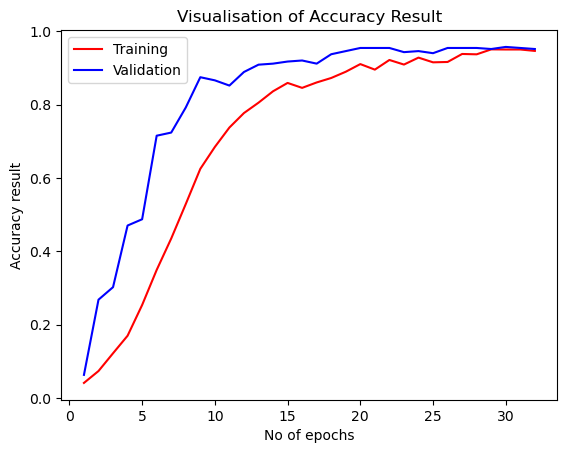

In [62]:
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation')
plt.xlabel('No of epochs')
plt.ylabel('Accuracy result')
plt.title('Visualisation of Accuracy Result')
plt.legend()

## SOME OTHER METRICS FOR MODEL EVALUATION

In [94]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [96]:
class_name=validation_set.class_names
class_name

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [98]:
y_pred=cnn.predict(test_set)

 4/12 ━━━━━━━━━━━━━━━━━━━━ 2s 341ms/step

2024-10-30 15:35:37.848602: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/12 ━━━━━━━━━━━━━━━━━━━━ 1s 322ms/step

2024-10-30 15:35:38.528693: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 288ms/step


In [99]:
y_pred,y_pred.shape

(array([[1.00000000e+00, 5.94888546e-21, 8.77770300e-22, ...,
         2.73966180e-13, 1.59253485e-10, 5.25824124e-17],
        [1.00000000e+00, 5.94888546e-21, 8.77770300e-22, ...,
         2.73966180e-13, 1.59253485e-10, 5.25824124e-17],
        [1.00000000e+00, 1.62612790e-16, 1.97998027e-29, ...,
         1.30872128e-15, 2.63818254e-20, 9.60853992e-17],
        ...,
        [1.86702927e-11, 1.91086019e-11, 7.32746021e-16, ...,
         1.62012733e-15, 5.37007665e-15, 9.99998927e-01],
        [3.13634397e-17, 2.33029496e-19, 1.02407884e-20, ...,
         5.85384811e-19, 7.58240421e-13, 1.00000000e+00],
        [1.07901599e-09, 7.00287120e-11, 7.84227849e-10, ...,
         2.59081923e-10, 7.46381943e-08, 9.99981403e-01]], dtype=float32),
 (359, 36))

In [100]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [101]:
predicted_categories

<tf.Tensor: shape=(359,), dtype=int64, numpy=
array([ 0,  0,  0,  0, 29, 15,  0,  0,  0, 15,  1,  1, 25,  1,  1,  1,  1,
        1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
        3,  3,  5,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,
        5,  5,  5,  3,  5,  5,  5,  5,  6,  6,  6,  6, 25,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8, 22,  8,  8,  8,
        8,  8,  8,  8, 31,  9,  9,  9,  9,  9,  9,  9, 31,  9, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 29, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 19, 21,

In [102]:
true_categories=tf.concat([y for x,y in test_set],axis=0)

2024-10-30 15:35:41.315962: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:35:41.882634: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-10-30 15:35:43.156123: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [103]:
true_categories

<tf.Tensor: shape=(359, 36), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [104]:
y_true=tf.argmax(true_categories,axis=1)

In [105]:
y_true

<tf.Tensor: shape=(359,), dtype=int64, numpy=
array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21,

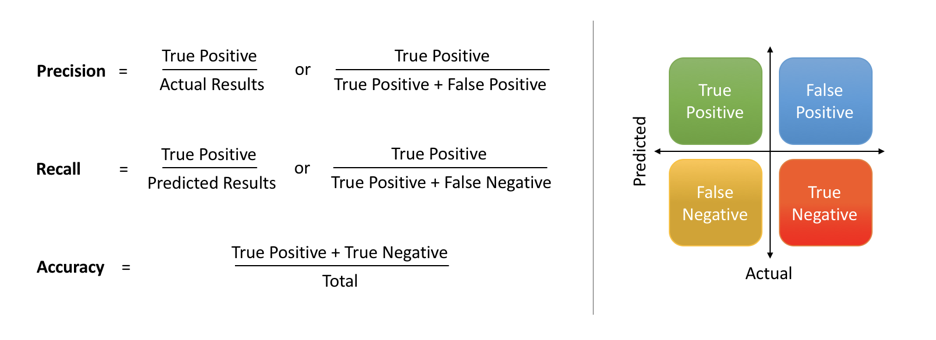

In [114]:
from sklearn.metrics import classification_report,confusion_matrix

In [116]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

               precision    recall  f1-score   support

        apple       1.00      0.70      0.82        10
       banana       1.00      0.89      0.94         9
     beetroot       1.00      1.00      1.00        10
  bell pepper       0.90      0.90      0.90        10
      cabbage       1.00      1.00      1.00        10
     capsicum       0.90      0.90      0.90        10
       carrot       1.00      0.90      0.95        10
  cauliflower       1.00      1.00      1.00        10
chilli pepper       1.00      0.90      0.95        10
         corn       0.89      0.80      0.84        10
     cucumber       1.00      1.00      1.00        10
     eggplant       1.00      1.00      1.00        10
       garlic       1.00      1.00      1.00        10
       ginger       1.00      1.00      1.00        10
       grapes       1.00      1.00      1.00        10
     jalepeno       0.83      1.00      0.91        10
         kiwi       1.00      1.00      1.00        10
        l

In [118]:
conf=confusion_matrix(y_true,predicted_categories)

In [120]:
conf

array([[ 7,  0,  0, ...,  0,  0,  0],
       [ 0,  8,  0, ...,  0,  0,  0],
       [ 0,  0, 10, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 10,  0,  0],
       [ 0,  0,  0, ...,  0, 10,  0],
       [ 0,  0,  0, ...,  0,  0, 10]])

Text(0.5, 1.0, 'Plant Disease Prediction Confusion Matrix')

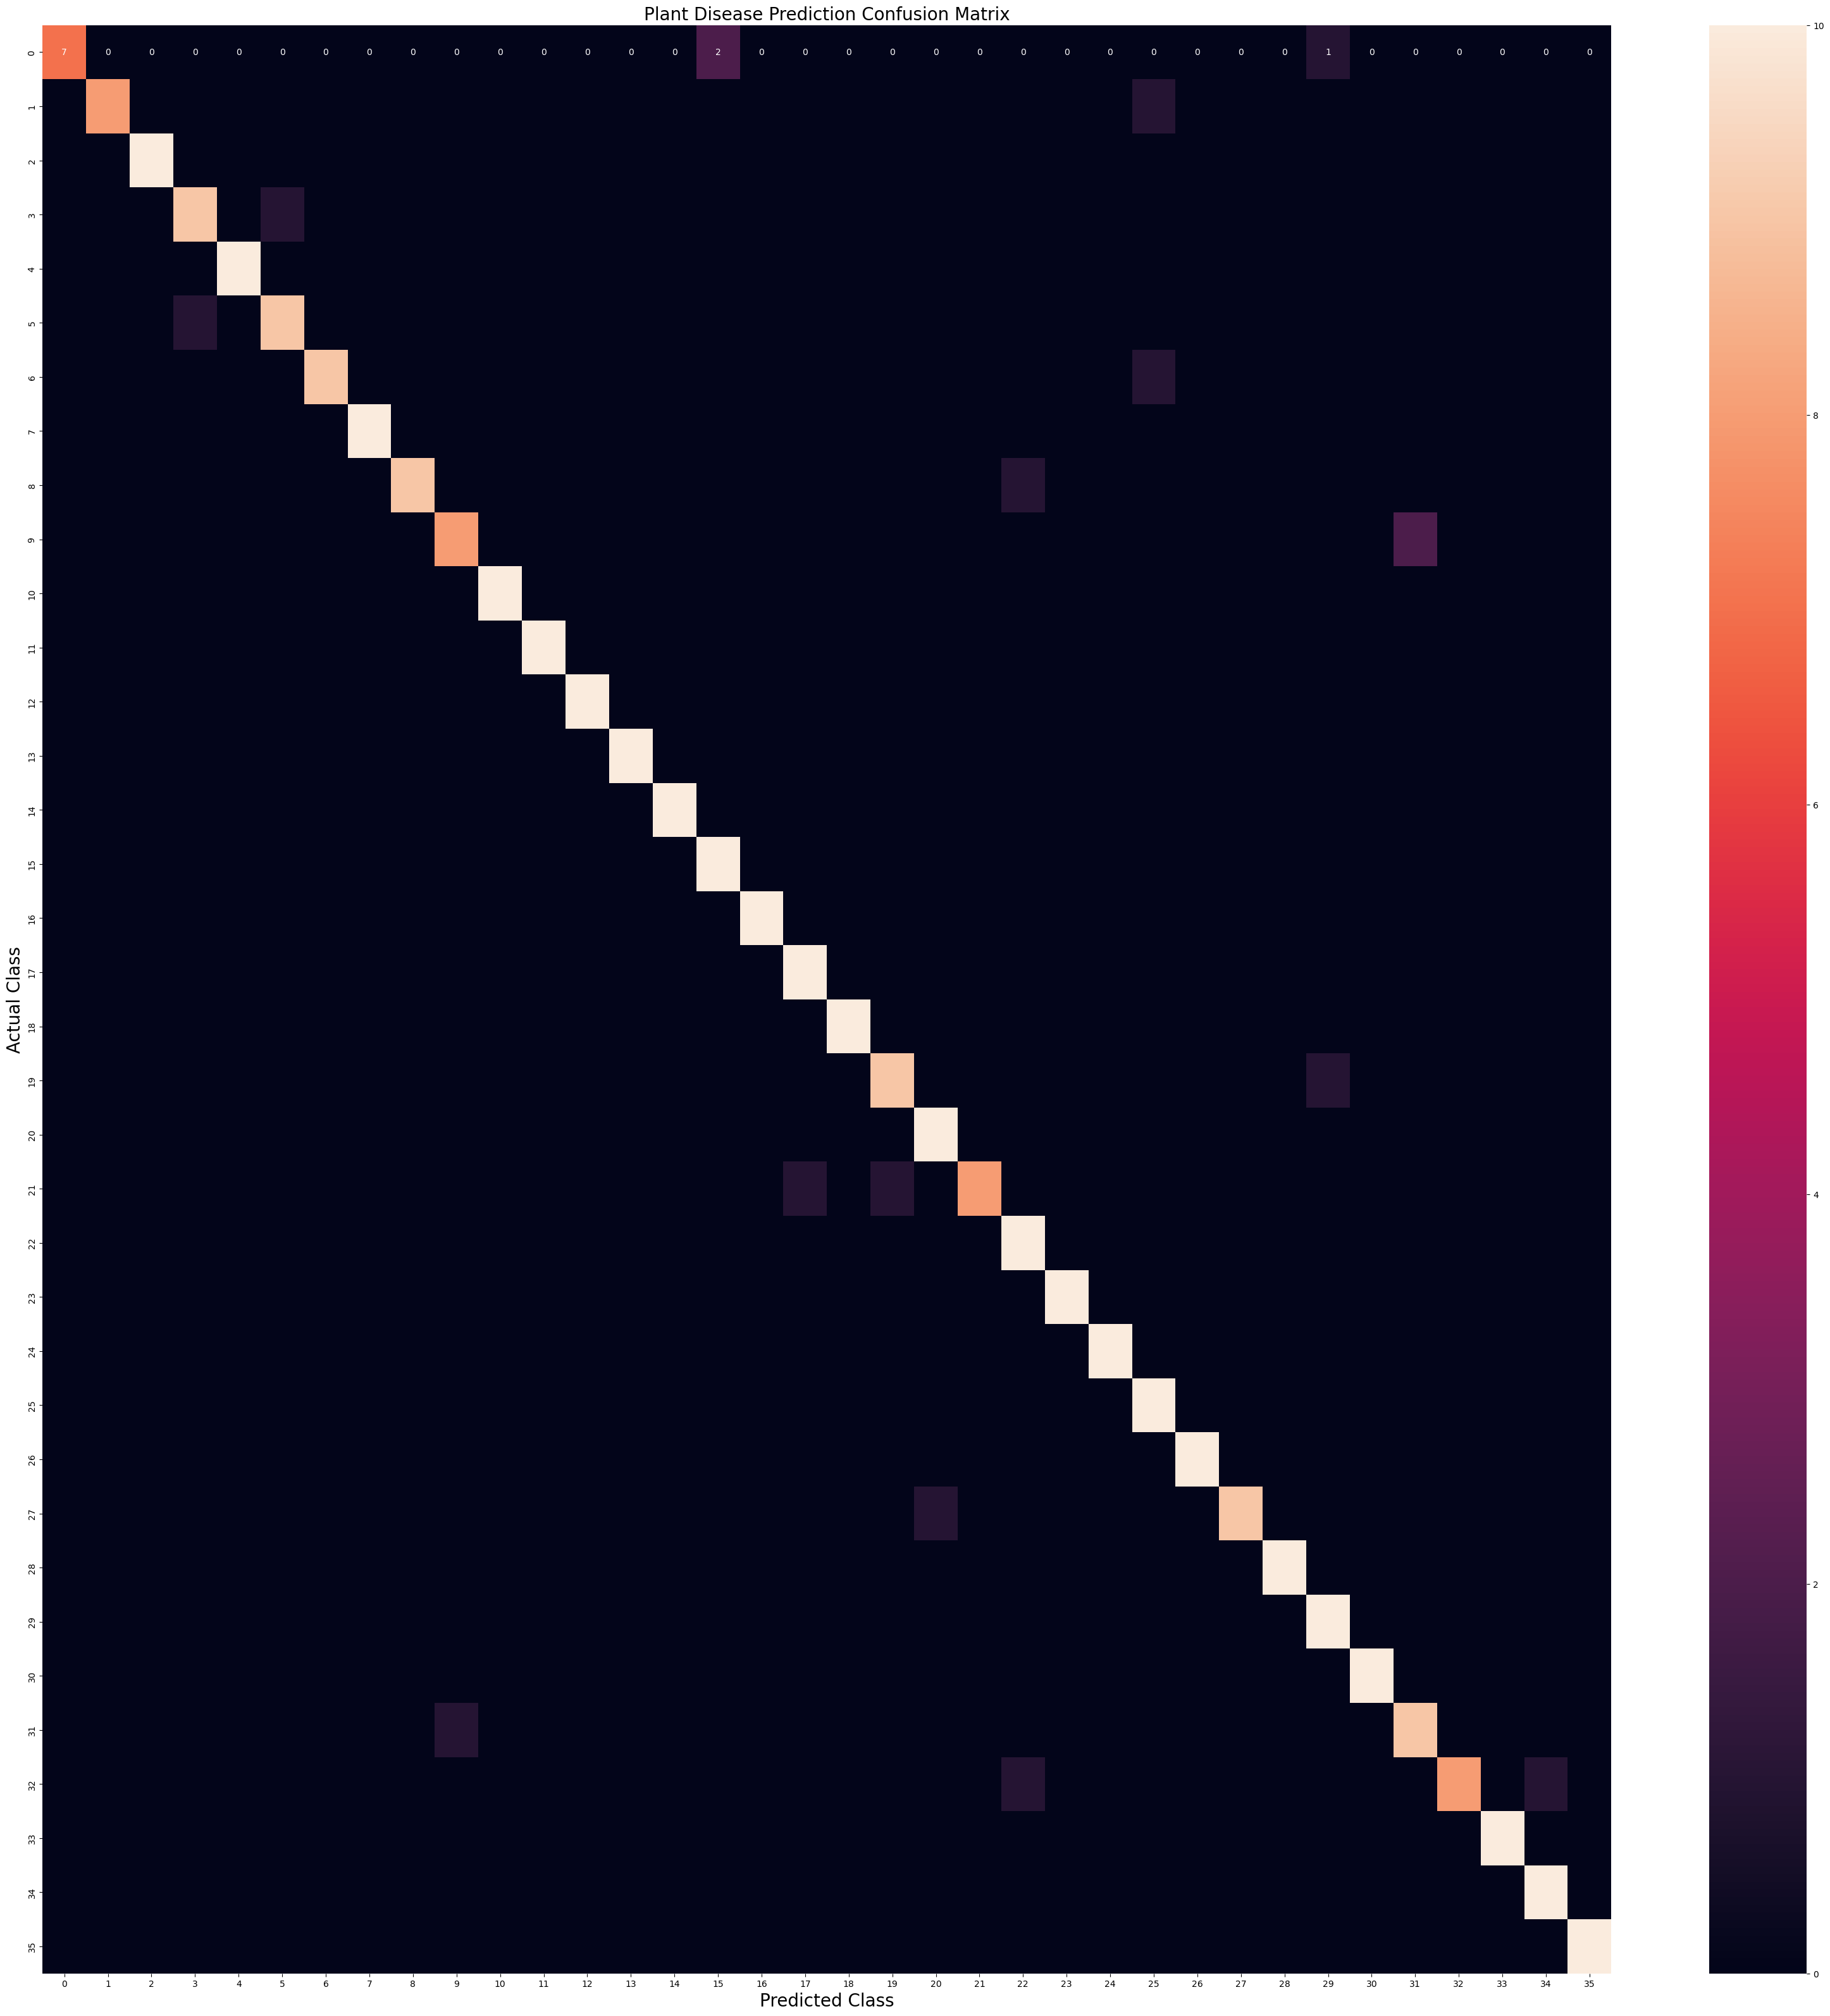

In [126]:
plt.figure(figsize=(40,40))
sns.heatmap(conf,annot=True)
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class", fontsize=20)
plt. title("Plant Disease Prediction Confusion Matrix",fontsize=20)